# EDA Contents 

## 'Placeholder'

# WIP

## Imports

### Main

In [82]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chess
import io
import sys
import chess.pgn
from io import StringIO
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


%matplotlib inline

import joblib

# import pickle
# from sklearn.utils import shuffle
# import gc
# import logging


from stockfish import Stockfish

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
# from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix,\
                            make_scorer, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

---

### Helpers

In [4]:
# import sys
# sys.modules.pop('detecting_cheaters_in_chess_helpers')

In [5]:
import detecting_cheaters_in_chess_helpers as hp

['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result',
       'BlackClock', 'BlackElo', 'BlackIsComp', 'BlackRD', 'ECO',
       'FICSGamesDBGameNo', 'PlyCount', 'Time', 'TimeControl', 'WhiteClock',
       'WhiteElo', 'WhiteRD', 'emt', 'moves', 'WhiteIsComp', 'NoComp']

-----

## DFs, Pickles, Checks

### Many pickles (or json)

#### 2022

In [ ]:
# raw_2022_list = [pd.read_json(
#     f'C:/Users/MaNiL/Desktop/data/capstone/raw/json/2022/ficsgamesdb_20220{num-17}_CvH_movetimes_2648{num}.json') for num in \
#                 range(18, 27)]

In [ ]:
# raw_2022_list[0].head(1)

In [ ]:
# raw_2022 = pd.concat(raw_2022_list).reset_index(drop=True)
# raw_2022.shape

In [ ]:
# # pickle 2022
# joblib.dump(raw_2022, 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2022_CvH.pkl')

#### 2021 and 2020

In [ ]:
# raw_2021 = joblib.load('./data/2021_CvH.pkl')

In [ ]:
# raw_2020 = joblib.load('./data/2020_CvH.pkl')

#### 2019 and 2018

In [ ]:
# raw_2019_2018_list = [pd.read_json(
#     f'C:/Users/MaNiL/Desktop/data/capstone/raw/json/{year}/ficsgamesdb_{year}_CvH_movetimes_2648{val}.json')\
#                       for year, val in zip(['2019', '2018'], ['15', '16'])]

In [ ]:
# raw_2019_2018_list[0].head(1)

In [ ]:
# raw_2019_2018_list[1].head(1)

In [ ]:
# raw_2019_2018 = pd.concat(raw_2019_2018_list).reset_index(drop=True)

In [ ]:
# # # pickle 2019 and 2018
# joblib.dump(raw_2019_2018_list[0], 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2019_CvH.pkl')
# joblib.dump(raw_2019_2018_list[1], 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2018_CvH.pkl')

### Mass concatenation

In [ ]:
# raw_2022
# raw_2021
# raw_2020
# raw_2019_2018

In [ ]:
# # on vostro laptop
# raw_pickle_list = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# sum([df_.shape[0] for df_ in raw_pickle_list])==pd.concat(raw_pickle_list).shape[0]

In [ ]:
# big_df = hp.concatenate_cleaned_pickles(raw_pickle_list)

In [ ]:
# X, y = hp.X_y_split_simple(big_df)

# y = hp.y_convert_to_ohe_vec(y)

In [ ]:
# y.head()

-----

### Mass concatenation test

#### Only 2022

In [ ]:
# raw_2022 = joblib.load('C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2022_CvH.pkl')

In [ ]:
# raw_2022 = hp.change_comp_columns(raw_2022)

In [ ]:
# raw_2022 = raw_2022.drop(columns=['Taco'])
# KeyError: "['Taco'] not found in axis"


In [ ]:
# def X_y_split_simple(df):
#     X_ = df.drop(columns=['WhiteIsComp', 'BlackIsComp', 'NoComp'])
#     y_ = df.loc[:,['WhiteIsComp', 'BlackIsComp', 'NoComp']]
#     return X_, y_

In [ ]:
# X_, y_ = hp.X_y_split_simple(raw_2022)

In [ ]:
# y_.head()

In [ ]:
# y_ = hp.y_convert_to_ohe_vec(y_)
# y_.head()

In [ ]:
# y_.shape

In [ ]:
# def y_convert_to_ohe_vec(y):
#     '''
#     Note: Loss will have to be 'categorical_crossentropy' if y's are one-hot-encoded, 'sparse_categorical_crossentropy' if y's are integers.
    
#     If all games contain a cheater, return integers for y where:
#         0 indicates white was cheating
#         1 indicates black was cheating
        
#     If any games contain no cheaters, return one-hot-encoded arrays for y where:
#         [1,0,0] indicates white was cheating
#         [0,1,0] indicates black was cheating
#         [0,0,1] indicates no-one was cheating
        
        
#     Have a check for explicit 'options=3' where user can input options value, or check len(y.columns)==3
#     '''
#     if len(y.columns)==3:
#         if all(y.NoComp==0):
#             y_ = pd.DataFrame(np.where(y.WhiteIsComp==1, 0, 1), columns=['0_WhiteIsComp_1_BlackIsComp'])
#             return y_
#         else:
#             y_ = pd.DataFrame([[row] for row in y.values], columns=['WhiteIsComp_BlackIsComp_NoComp'])
#             return y_        
#     else:
#         return(print('Function only currently supporting y having WhiteIsComp, BlackIsComp, and NoComp'))

In [ ]:
# all(y_.NoComp==0)

In [ ]:
# (y_.WhiteIsComp==1).head()

In [ ]:
# np.where(y_.WhiteIsComp==1, 0, 1)

In [ ]:
# y_t = y_.copy()
# y_t['0_WhiteIsComp_1_BlackIsComp'] = np.where(y_t.WhiteIsComp==1, 0, 1)

In [ ]:
# y_t.head(5)

In [ ]:
# y_tt = pd.DataFrame(np.where(y_.WhiteIsComp==1, 0, 1), columns=['0_WhiteIsComp_1_BlackIsComp'])
# y_tt

In [ ]:
# for row in y_.values:
#     print(row)

# pd.DataFrame([[row] for row in y_.values], columns=['WhiteIsComp_BlackIsComp_NoComp'])

In [ ]:
# y_test_ = y_convert_to_ohe_vec(y_)
# y_test_

-----

#### Only 2021 and 2020

In [ ]:
# only have these two years on one-drive
# raw_p = [raw_2021, raw_2020]

In [ ]:
# df_2021_2020 = pd.concat(list_cleaned_p).reset_index(drop=True)

In [ ]:
# df_2021_2020.head(2)

In [ ]:
# sns.pairplot(df_2021_2020)
# plt.show()

In [ ]:
# X = df_2021_2020.drop(columns=['WhiteIsComp', 'BlackIsComp', 'NoComp'])
# y = df_2021_2020.loc[:,['WhiteIsComp', 'BlackIsComp', 'NoComp']]

In [ ]:
# X.head(2)

In [ ]:
# # %%timeit
# test_=X.copy()

# # test_[['TimeControl_Base', 'TimeControl_Inc']]=[
# #     (str.split(x, sep='+')[0], str.split(x, sep='+')[1]) for x in X.TimeControl.values] # 117 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# # test_[['TimeControl_Base', 'TimeControl_Inc']]=[
# #     (str.split(x, sep='+')) for x in X.TimeControl.values] # 110 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# test_[['TimeControl_Base', 'TimeControl_Inc']]=[
#     (int(str.split(x, sep='+')[0]), int(str.split(x, sep='+')[1])) for x in X.TimeControl.values]


# test_

-----

#### 2022 to 2018 inclusive

In [ ]:
# # on vostro laptop
# raw_p = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/raw/pickles/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# list_cleaned_p = hp.clean_pickles(raw_p)

In [ ]:
# sum([df_.shape[0] for df_ in list_cleaned_p])

In [ ]:
# pd.concat(list_cleaned_p).shape

In [ ]:
# sum([df_.shape[0] for df_ in list_cleaned_p])==pd.concat(list_cleaned_p).shape[0]

In [ ]:
# raw_p[0].head(1)
# raw_p[0].columns

In [ ]:
# df_2022_2018_CvH_raw = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Event', 'Site', 'Round', 'BlackClock',
#                          'FICSGamesDBGameNo', 'Time', 'WhiteClock'])

# # Shape pre-drop: (198779, 17)
# # Dropping duplicates...
# # Shape post-drop: (198539, 17)
# #  Duplicates dropped: 240

In [ ]:
# df_2022_2018_CvH_raw_test = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Event', 'Site', 'Round', 'BlackClock',
#                          'Time', 'WhiteClock'])

# # Shape pre-drop: (198779, 18)
# # Dropping duplicates...
# # Shape post-drop: (198779, 18)
# #  Duplicates dropped: 0

In [ ]:
# df_2022_2018_CvH_raw_test = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['FICSGamesDBGameNo'])

# Shape pre-drop: (198779, 23)
# Dropping duplicates...
# Shape post-drop: (198768, 23)
#  Duplicates dropped: 11

Depending on what columns you drop, there are a different number of duplicates found. This could be investigated further in future.

The below reappears later on in the notebook but I put it here just to remind myself that for some analysis I do keep Event.

In [ ]:
# df_2022_2018_CvH_raw = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Site', 'Round', 'BlackClock',
#                          'FICSGamesDBGameNo', 'Time', 'WhiteClock'])

# # All PlyCount values match the length of moves-list
# # Shape pre-drop: (198779, 18)
# # Dropping duplicates...
# # Shape post-drop: (198539, 18)
# #  Duplicates dropped: 240

In [ ]:
# joblib.dump(df_2022_2018_CvH_raw,
#            'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2022_2018_CvH_distinv_withevent.pkl',
#            compress=9)

#### Other

In [ ]:
# df = pd.read_json("data/raw_data/json/ficsgamesdb_search_ignore_colour_test.json")

In [ ]:
# # should have 271 games, I think I said it would have 300

# df_wrong_num_test = pd.read_json('C:/Users/MaNiL/Desktop/data/capstone/raw/json/First_tests/ignore_colour_wrong_number_fed.json')

# print(df_wrong_num_test.shape)
# hp.chess_checker_function(df_wrong_num_test)
# df_wrong_num_test = hp.change_comp_columns(df)
# print(df_wrong_num_test.columns)
# hp.chess_nan_checker(df_wrong_num_test)

In [ ]:
# df = pd.read_json("C:/Users/MaNiL/Desktop/data/capstone/raw/json/Standard_2021_all_ratings/ficsgamesdb_2021_standard_movetimes_264828.json")

# joblib.dump(df, './data/2021_all_ratings.pkl')

In [ ]:
# df = joblib.load('./data/2021_CvH.pkl')

# # df = joblib.load('C:/Users/Emanuel/OneDrive/My Documents/')

# # df = joblib.load('C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2021_CvH.pkl')

In [ ]:
# hp.chess_checker_function(df)

In [ ]:
# df.info()

In [ ]:
# nocomp_df = hp.change_comp_columns(df)
# print(nocomp_df.columns)

['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result',
       'BlackClock', 'BlackElo', 'BlackIsComp', 'BlackRD', 'ECO',
       'FICSGamesDBGameNo', 'PlyCount', 'Time', 'TimeControl', 'WhiteClock',
       'WhiteElo', 'WhiteRD', 'emt', 'moves', 'WhiteIsComp', 'NoComp']

In [ ]:
# nocomp_df.head(1)

In [ ]:
# hp.chess_nan_checker(nocomp_df)

-----

### Some Cleaning & Inv

#### Separating Standard Games (not imposed in cleaning yet)

In [ ]:
# Unique events

# nocomp_df[['Event']].head()

# nocomp_df['Event'].unique()

In [ ]:
# nocomp_df = joblib.load('C:/Users/Emanuel/Desktop/data/capstone/raw/2021_CvH.pkl')
# nocomp_df = hp.change_comp_columns(nocomp_df)

In [ ]:
# nocomp_df.head(3)

In [ ]:
# nocomp_df[['Event']].groupby(['Event']).value_counts().sort_values()

In [ ]:
# test_ = nocomp_df[['Event', 'TimeControl', 'Time', 'Result', 'White', 'WhiteIsComp', 'Black', 'BlackIsComp', 'NoComp']]
# test_.head()

In [ ]:
# 900/60

In [ ]:
# event_control = test_.groupby(['Event', 'TimeControl']).count().reset_index().loc[:, ['Event', 'TimeControl']]
# event_control

In [ ]:
# # event_control[ ['standard game' in event_control['Event'].values] ] # doesn't work

# # ['standard game' in x for x in event_control['Event'].values]

# standard_games = event_control[['standard game' in x for x in event_control['Event'].values]]
# display(standard_games.head())
# display(standard_games.TimeControl.unique())
# standard_games_times = standard_games.TimeControl.unique()

In [ ]:
# blitz_games = event_control[['blitz game' in x for x in event_control['Event'].values]]
# display(blitz_games.head())
# display(blitz_games.TimeControl.unique())
# blitz_games_times = blitz_games.TimeControl.unique()

In [ ]:
# any([b_time in standard_games_times for b_time in blitz_games_times]) # False

# # '900+1' in standard_games_times # True

In [ ]:
# standard_game_times_sort = standard_games_times.copy()
# standard_game_times_sort=[str.split(x, sep='+') for x in standard_game_times_sort]
# standard_game_times_sort = pd.DataFrame([[int(row[0]), int(row[1])] for \
#                                          row in standard_game_times_sort]).sort_values(
#     by=0,
#     axis=0,
#     ascending=False).reset_index(drop=True).rename(columns={1: 'inc'})
# standard_game_times_sort.head()

In [ ]:
# standard_game_times_sort

In [ ]:
# blitz_games_times_sort = blitz_games_times.copy()
# blitz_games_times_sort=[str.split(x, sep='+') for x in blitz_games_times_sort]
# blitz_games_times_sort = pd.DataFrame([[int(row[0]), int(row[1])] for \
#                                          row in blitz_games_times_sort]).sort_values(
#     by=0,
#     axis=0,
#     ascending=False).reset_index(drop=True).rename(columns={1: 'inc'})
# blitz_games_times_sort.head()

In [ ]:
# s_b_merged = pd.merge(standard_game_times_sort, blitz_games_times_sort, how='outer', on=0, suffixes=('_s', '_b'))

In [ ]:
# s_b_merged

In [ ]:
# for row in s_b_merged.values:
#     print(row)

In [ ]:
# np.c_[standard_games_times, blitz_games_times]


In [ ]:
# nocomp_df['TimeControl'].values

In [ ]:
# nocomp_df[['3600' in x for x in nocomp_df['TimeControl'].values]].shape # (250, 23)

In [ ]:
# only 250 games in 2021_CvH were started as 60+ minutes; it is possible that games went on for longer than 60 
# minutes

-----

#### Unique players investigation

----

#### Get rid of draws 

In [ ]:
# nocomp_df['Result'].unique()

In [ ]:
# nocomp_df[['WhiteIsComp', 'BlackIsComp','Result']]

In [ ]:
# nocomp_df['Result']=='1-0'

In [ ]:
# ## filters

# # Computer wins as white 
# comp_w_w = ((nocomp_df['Result']=='1-0')&(nocomp_df['WhiteIsComp']==1))
# # Computer wins as black
# comp_b_w = ((nocomp_df['Result']=='0-1')&(nocomp_df['BlackIsComp']==1))
# # Draw
# no_draw = (nocomp_df['Result']!='1/2-1/2')

In [ ]:
# right_result_df = nocomp_df[comp_w_w |
#                             comp_b_w]

In [ ]:
# right_result_df.shape # (28013, 23)

In [ ]:
# any(right_result_df['Result']=='1/2-1/2') # no draws

In [ ]:
# no_draws_df.shape

-----

#### Get rid of lightning games

In [ ]:
df_2018 = joblib.load('./data/raw/2018_CvH.pkl')

In [ ]:
df_2018.shape

In [ ]:
df_2018.tail()

In [ ]:
df_2018['Event'].unique()

In [ ]:
df_2018['Event'].values

In [ ]:
'lightning game' in df_2018['Event'].values

In [ ]:
'lightning game' in df_2018[['Event']]

In [ ]:
['lightning game' in df_2018['Event'].values]

In [ ]:
[row for row in df_2018['Event'] if 'lightning game' in row];

In [ ]:
# %%timeit # Muninn: 1.85 ms ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

df_2018_lightning = df_2018[['lightning game' in row for row in df_2018.Event]] # (20,22)

In [ ]:
# # %%timeit # Muninn: 2.1 ms ± 29.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

# # lightning_check = df_2018.apply(lambda x: x if 'lightning game' in x[['Event']] else np.NaN, axis=1)
# lightning_check = df_2018['Event'].apply(lambda x: True if 'lightning game' in x else False)
# df_2018[lightning_check] # (20, 22)

In [ ]:
df_2018_lightning['TimeControl'];

----

#### Get rid of redundant columns

In [ ]:
# right_result_df.columns

In [ ]:
# all(right_result_df['WhiteClock']==right_result_df['BlackClock'])

In [ ]:
# df_clean = right_result_df.drop(columns=[
#     'Event', 'Site', 'Date', 'Round', 'White', 'Black', 'BlackClock', 'FICSGamesDBGameNo', 'Time', 'WhiteClock',
#     'Result'
# ])

In [ ]:
# df_clean

------

#### Function to 'clean' any pickle

For now, some columns (and row values) remain for initial modelling.

In [ ]:
# def clean_pickle(pickle_df):
#     hp.chess_checker_function(pickle_df)
#     temp_ = hp.change_comp_columns(pickle_df)
#     hp.chess_nan_checker(temp_)
#     # Computer wins as white 
#     comp_w_w = ((temp_['Result']=='1-0')&(temp_['WhiteIsComp']==1))
#     # Computer wins as black
#     comp_b_w = ((temp_['Result']=='0-1')&(temp_['BlackIsComp']==1))
#     temp_ = temp_[
#         ((temp_['Result']=='1-0')&(temp_['WhiteIsComp']==1))|
#         ((temp_['Result']=='0-1')&(temp_['BlackIsComp']==1))]
    
    
#     col_to_drop = [
#         'Event', 'Site', 'Date', 'Round', 'White', 'Black', 'BlackClock', 'FICSGamesDBGameNo', 'Time', 'WhiteClock',
#         'Result'
#         ]
    
#     temp_ = temp_.drop(columns=col_to_drop)
#     print(f'Dropped columns: {col_to_drop}')
#     return temp_

In [ ]:
# def clean_pickles(list_of_pickle_df):
#     list_of_cleaned_pickle_df = []
#     for pickle_df in list_of_pickle_df:
#         list_of_cleaned_pickle_df.append(clean_pickle(pickle_df))
        
#     return list_of_cleaned_pickle_df

In [ ]:
# raw_2021 = joblib.load('./data/2021_CvH.pkl')

In [ ]:
# raw_2020 = joblib.load('./data/2020_CvH.pkl')

In [ ]:
# cleaned_2021 = clean_pickle(raw_2021)

In [ ]:
# raw_p = [raw_2021, raw_2020]

In [ ]:
# list_cleaned_p = clean_pickles(raw_p)

In [ ]:
# type(list_cleaned_p)

In [ ]:
# display(list_cleaned_p[0].head(2))
# display(list_cleaned_p[0].shape)

In [ ]:
# display(list_cleaned_p[1].head(2))
# display(list_cleaned_p[1].shape)

In [ ]:
# list_cleaned_p[0].shape[0]+list_cleaned_p[1].shape[0]

In [ ]:
# pd.concat(list_cleaned_p).shape

In [ ]:
# list_cleaned_p[0].shape[0]+list_cleaned_p[1].shape[0]==pd.concat(list_cleaned_p).shape[0]

-----

## First Pass Modelling

### Load and functional cleaning

In [ ]:
# # on vostro laptop
# raw_pickle_list = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/raw/pickles/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# # on Muninn
# raw_pickle_list = [joblib.load(f'C:/Users/Emanuel/Desktop/data/capstone/raw/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# # using cloud-available data (currently only 2021 and 2020)
# raw_pickle_list = [joblib.load(f'./data/{year}_CvH.pkl') for \
#          year in np.arange(2021, 2019, -1)] # load the pickles from 2022 to 2018 inclusive

Shape sanity check:

In [ ]:
# sum([df_.shape[0] for df_ in raw_pickle_list])==pd.concat(raw_pickle_list).shape[0]

In [ ]:
# big_df = hp.concatenate_cleaned_pickles(raw_pickle_list)


# # Shape pre-drop: (198779, 13)
# # Dropping duplicates...
# # Shape post-drop: (198521, 13)
# #  Duplicates dropped: 258

In [ ]:
# on Muninn
# joblib.dump(big_df, 'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/2022_2018_CvH.pkl', compress=7)

# big_df = joblib.load('C:/Users/Emanuel/Desktop/data/capstone/preprocessed/2022_2018_CvH.pkl')

In [ ]:
# on cloud
big_df = joblib.load('./data/preprocessed/2022_2018_CvH.pkl')

In [ ]:
X, y = hp.X_y_split_simple(big_df)

y = hp.y_convert_to_ints(y)

------

### Base Models (no cross-validation)

#### Further cleaning (no 'emt' or 'moves')

In [ ]:
y.head()

In [ ]:
y.value_counts(normalize=True)*100

# WhiteIsComp_BlackIsComp_NoComp
# 1                                 50.196201
# 0                                 49.803799

In [ ]:
y.value_counts();

# WhiteIsComp_BlackIsComp_NoComp
# 1                              99650
# 0                              98871

Knowing the distribution of the target is important when considering model performance.

In [ ]:
X.head(2)

In [ ]:
X.shape # (198779, 10)

In [ ]:
unique_openings = X.ECO.unique()
len(unique_openings) # 494

Openings (ECO) will be one hot encoded. 

Removing emt and moves for now but feature engineering can be done to them in future (after base models). 

In [ ]:
X_ = X.drop(columns=['emt', 'moves'])

In [ ]:
X_.head()

-----

#### Test Train Split

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=22,
                                                                     stratify=y)

In [ ]:
# X_remainder, X_test, y_remainder, y_test = train_test_split(X_, y, test_size=0.2, random_state=22,
#                                                                      stratify=y)

# X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, train_size=0.7,
#                                                                random_state=22, stratify=y_remainder)

In [ ]:
# validation is 30%

------

#### OHE ECO

In [ ]:
ohe = OneHotEncoder(sparse=False, dtype=np.int8(), handle_unknown='ignore')

In [ ]:
# ohe.fit(X_train[['ECO']])
# X_train_ECO_ohe = ohe.transform(X_train[['ECO']])

In [ ]:
# X_test_ECO_ohe = ohe.transform(X_test[['ECO']])

In [ ]:
# X_train_ECO_ohe.shape # (55151, 477)

In [ ]:
# ohe.get_feature_names_out()[0:10]

In [ ]:
# pd.DataFrame(X_train_ECO_ohe, columns=ohe.get_feature_names_out()).head()

In [ ]:
# X_train[['ECO']].head()

In [ ]:
# X_train_ = pd.merge(
#     left=X_train.drop(columns=['ECO']).reset_index(drop=True),
#     right=pd.DataFrame(X_train_ECO_ohe, columns=ohe.get_feature_names_out()),
#     how='left',
#     left_index=True,
#     right_index=True)
# # X_train_.head()

In [ ]:
X_train_ = pd.merge(
    left=X_train.drop(columns=['ECO']).reset_index(drop=True),
    right=pd.DataFrame(ohe.fit_transform(X_train[['ECO']]), columns=ohe.get_feature_names_out()),
    how='left',
    left_index=True,
    right_index=True)

In [ ]:
X_train_.head()

In [ ]:
X_test_ = pd.merge(
    left=X_test.drop(columns=['ECO']).reset_index(drop=True),
    right=pd.DataFrame(ohe.transform(X_test[['ECO']]), columns=ohe.get_feature_names_out()),
    how='left',
    left_index=True,
    right_index=True)

In [ ]:
X_test_.head() # 5 rows × 499 columns

-----

#### Scaling

In [ ]:
stan_scal = StandardScaler()

In [ ]:
X_train_scaled=X_train_.copy()

X_train_scaled[['BlackElo', 'BlackRD',
                'PlyCount', 'WhiteElo',
                'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']] = stan_scal.fit_transform(X_train_[[
    'BlackElo', 'BlackRD', 'PlyCount', 'WhiteElo', 'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']])

X_test_scaled=X_test_.copy()

X_test_scaled[['BlackElo', 'BlackRD',
                'PlyCount', 'WhiteElo',
                'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']] = stan_scal.transform(X_test_[[
    'BlackElo', 'BlackRD', 'PlyCount', 'WhiteElo', 'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']])



In [ ]:
display(X_train_scaled.head()) # 5 rows × 499 columns
display(X_test_scaled.head()) # 5 rows × 499 columns

-----

#### Logistic Regression

In [ ]:
# logreg = LogisticRegression(penalty='l2', max_iter=10000,
#                            solver='lbfgs', C=1.0) # default settings

In [ ]:
# y_train.values.shape

In [ ]:
# np.reshape(y_train.values, (-1,)).shape # (159023,)

# logreg.fit(X_train_scaled, np.reshape(y_train.values, (-1,)))

# joblib.dump(logreg, 'C:/Users/Emanuel/Desktop/data/capstone/pickles/first_logreg.pkl', compress=7)

In [ ]:
logreg = joblib.load('./models/first_pass/first_logreg.pkl')

In [ ]:
# display(y_train.head())
# display(y_test.head())

In [ ]:
y_train_ = np.reshape(y_train.values, (-1,))
y_test_ = np.reshape(y_test.values, (-1,))

In [ ]:
y_train_.shape

In [ ]:
# print(f'The accuracy score on the training data is: {logreg.score(X_train_scaled, y_train_)}')
# print(f'The accuracy score on the testing data is: {logreg.score(X_test_scaled, y_test_)}')

In [ ]:
# plot_confusion_matrix(logreg, X_test_scaled, y_test_)

# logreg_y_pred = logreg.predict(X_test_scaled)
# print(classification_report(y_test_, logreg_y_pred))

In [ ]:
# logreg_results = pd.DataFrame(
#     classification_report(
#         y_test_, logreg_y_pred, output_dict=True)).loc[
#     ['precision', 'recall', 'f1-score'],
#     ['0', '1', 'accuracy']]

In [ ]:
# log_reg_coefficients = pd.DataFrame(
#     data=logreg.coef_, columns=logreg.feature_names_in_)
# log_reg_coefficients.T.sort_values(by=0, ascending=False)

In [ ]:
logreg_report, logreg_results, logreg_coefficients = hp.class_model_eval_logreg(
    logreg, X_train_scaled, X_test_scaled, y_train_, y_test_)

In [ ]:
log_reg_coefficients = pd.DataFrame(
    data=abs(logreg.coef_), columns=logreg.feature_names_in_)

log_reg_coefficients.T.rename(columns={0: 'coefficient_weights'}).sort_values(
    by='coefficient_weights', ascending=False).head(15)

Should look into these openings ?

------

#### Random Forest

In [ ]:
# random_forest = RandomForestClassifier(n_estimators=100) # default values
# random_forest.fit(X_train_, y_train)
 

In [ ]:
# joblib.dump(random_forest, './models/first_pass/first_randfor.pkl', compress=7)

In [ ]:
random_forest = joblib.load('./models/first_pass/first_randfor.pkl')

In [ ]:
X_train_

In [ ]:
decision_tree_train_scores = []
for sub_tree in random_forest.estimators_:
    decision_tree_train_scores.append(sub_tree.score(X_train_, y_train))
    
print("Performance on fitted data:")
print(f"Average Decision Tree: {np.mean(decision_tree_train_scores)}")
print(f"Random Forest: {random_forest.score(X_train_, y_train)}")

In [ ]:
decision_tree_test_scores = []
for sub_tree in random_forest.estimators_:
    decision_tree_test_scores.append(sub_tree.score(X_test_, y_test))

print("Performance on Test data:")
print(f"Average Decision Tree: {np.mean(decision_tree_test_scores)}")
print(f"Random Forest: {random_forest.score(X_test_, y_test)}")

In [ ]:
feature_df = pd.DataFrame(
{"feature_importance": random_forest.feature_importances_},
index=X_train_.columns)

feature_df.sort_values(by='feature_importance', ascending=False).head(15)

-----

## Loading in human-only games

###### Reminder of shapes:

In [ ]:
# the (non-emt&moves df shapes)
display(X_.shape)
display(y.value_counts())

In [ ]:
# joblib.load('./data/2022_2018_CvH.pkl').shape # (198779, 13)

----

### Looking at 2021_all_ratings

In [ ]:
# big_df = joblib.load('C:/Users/Emanuel/Desktop/data/capstone/raw/2021_all_ratings.pkl')

In [ ]:
# display(big_df.head(1))
# big_df.shape

In [ ]:
# big_df = hp.clean_pickle(big_df)

In [ ]:
# big_df.shape

In [ ]:
# big_df.head(2)

In [ ]:
# big_df[big_df['NoComp']==0]

In [ ]:
# X, y = hp.X_y_split_simple(big_df)

# y = hp.y_convert_to_ohe_vec(y)

There are still cheaters in 2021_all_ratings. Another download will be looked at.

-----

### Looking at titled years

#### Loading titled years as raw_pickle_list

In [ ]:
# # on Muninn
# raw_pickle_list = [pd.read_json(
#     f'C:/Users/Emanuel/Desktop/data/capstone/raw/json/Titled/ficsgamesdb_{year}_titled_movetimes_26{val}.json') \
#                    for year, val in zip(np.arange(2021, 2016, -1), [4827, 5091, 5092, 5093, 5094])]

In [ ]:
# sum([df_.shape[0] for df_ in raw_pickle_list])==pd.concat(raw_pickle_list).shape[0]

In [ ]:
# big_df = hp.concatenate_cleaned_pickles(raw_pickle_list)

In [ ]:
# joblib.dump(big_df, 'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/2021_2017_titled.pkl', compress=7)

----

##### pickle-list-checking-years

In [ ]:
# for i in range(len(raw_pickle_list)):
#     print(raw_pickle_list[i].Date.iloc[-10].year)
    

In [ ]:
# raw_pickle_list[0].columns

In [ ]:
# df_2020 = raw_pickle_list[1]

In [ ]:
# df_2019_in_2020_data = df_2020[[row.year==2019 for row in df_2020.Date]] # 38x22
# df_2019_in_2020_data.head(1)

In [ ]:
# df_2019 = raw_pickle_list[2]

In [ ]:
# df_2019.tail(2)

In [ ]:
# df_2019.Date.iloc[-1].year

In [ ]:
# df_2018 = raw_pickle_list[2]

In [ ]:
df_2017 = raw_pickle_list[-1]

In [ ]:
df_2017['WhiteRD'].value_counts()

In [ ]:
df_2017[['BlackRD', 'WhiteRD']]

In [ ]:
df_2017[(df_2017['BlackRD']=='na') | (df_2017['WhiteRD']=='na')]; # 10720 rows × 22 columns
['unrated' in row for row in df_2017[(df_2017['BlackRD']=='na') | (df_2017['WhiteRD']=='na')]['Event']];

df_2017[(df_2017['BlackRD']=='na') | (df_2017['WhiteRD']=='na')][
    ['unrated' in row for row in df_2017[(df_2017['BlackRD']=='na') | (df_2017['WhiteRD']=='na')]['Event']]
];

df_2017[['unrated' in row for row in df_2017['Event']]]
#.describe()

In [ ]:
(df_2017[['WhiteRD']]=='na' )

-----

#### Loading preprocessed titled pickle and functional cleaning

In [ ]:
titled_df = joblib.load('./data/preprocessed/2021_2017_titled.pkl')

In [ ]:
titled_df.head(2)

In [ ]:
titled_df.shape; # (87869, 13)

----

In [ ]:
X_titled, y_titled = hp.X_y_split_simple(titled_df)

In [ ]:
y_titled.head(2)

In [ ]:
y_titled = hp.y_convert_to_ints(y_titled)

In [ ]:
y_titled.head(2)

In [ ]:
y_titled.shape # (87869, 1)

In [ ]:
X_titled.head()

Dropping emt and moves:

In [ ]:
X_titled_ = X_titled.drop(columns=['emt', 'moves'])

In [ ]:
X_titled_.head()

## Join cheater and human-only

In [ ]:
X_CvH_HvH = pd.concat([X_, X_titled_]).reset_index(drop=True)
y_CvH_HvH = pd.concat([y, y_titled]).reset_index(drop=True)

In [ ]:
# joblib.dump(X_CvH_HvH, 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/X_CvH_HvH.pkl', compress=9)

# joblib.dump(y_CvH_HvH, 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/y_CvH_HvH.pkl', compress=9)

In [ ]:
X_CvH_HvH = joblib.load('./data/preprocessed/X_CvH_HvH.pkl')
y_CvH_HvH = joblib.load('./data/preprocessed/y_CvH_HvH.pkl')

In [ ]:
X_CvH_HvH

In [ ]:
y_CvH_HvH

-----

## Second Pass Modelling

### Train Test Split

In [ ]:
X_CvH_HvH_train, X_CvH_HvH_test, y_CvH_HvH_train, y_CvH_HvH_test = train_test_split(
    X_CvH_HvH, y_CvH_HvH, test_size=0.2, random_state=22, stratify=y_CvH_HvH)

------

### OHE ECO

In [ ]:
# ohe_CvH_HvH = OneHotEncoder(sparse=False, dtype=np.int8(), handle_unknown='ignore')

In [ ]:
# def OHE_ECO(X_train, X_test):
#     ohe_ = OneHotEncoder(sparse=False, dtype=np.int8(), handle_unknown='ignore')
#     X_train_temp_ = pd.merge(
#         left=X_train.drop(columns=['ECO']).reset_index(drop=True),
#         right=pd.DataFrame(ohe_.fit_transform(X_train[['ECO']]),
#                            columns=ohe_.get_feature_names_out()),
#         how='left',
#         left_index=True,
#         right_index=True)
    
#     X_test_temp_ = pd.merge(
#         left=X_test.drop(columns=['ECO']).reset_index(drop=True),
#         right=pd.DataFrame(ohe_.transform(X_test[['ECO']]),
#                            columns=ohe_.get_feature_names_out()),
#         how='left',
#         left_index=True,
#         right_index=True)
#     return X_train_temp_, X_test_temp_, ohe_

In [ ]:
X_CvH_HvH_train_, X_CvH_HvH_test_, ohe_CvH_HvH = hp.OHE_ECO(X_CvH_HvH_train, X_CvH_HvH_test)

In [ ]:
X_CvH_HvH_train_.shape

In [ ]:
X_CvH_HvH_test_.shape

------

### Scale data

In [ ]:
stan_scal_CvH_HvH = StandardScaler()

In [ ]:
any([any(X_CvH_HvH_train_[col].isna()) for col in X_CvH_HvH_train_.columns]) # Should be False

#### Imputing some BlackRD and WhiteRD values

In [ ]:
# X_CvH_HvH_train_.info(verbose=True)

In [ ]:
X_CvH_HvH_train_scaled=X_CvH_HvH_train_.copy()
X_CvH_HvH_test_scaled=X_CvH_HvH_test_.copy()

In [ ]:
X_CvH_HvH_train_scaled[['BlackRD', 'WhiteRD']] = np.array([
    [np.int8(0) if y=='na' else y for y in x] for x in X_CvH_HvH_train_scaled[['BlackRD', 'WhiteRD']].values
    ]) # 402 ms ± 2.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [ ]:
X_CvH_HvH_test_scaled[['BlackRD', 'WhiteRD']] = np.array([
    [np.int8(0) if y=='na' else y for y in x] for x in X_CvH_HvH_test_scaled[['BlackRD', 'WhiteRD']].values
    ]) 

---

#### Scaling

In [ ]:
X_CvH_HvH_train_scaled[['BlackElo', 'BlackRD',
                'PlyCount', 'WhiteElo',
                'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']] = stan_scal_CvH_HvH.fit_transform(
    X_CvH_HvH_train_scaled[['BlackElo', 'BlackRD', 'PlyCount', 'WhiteElo',
                            'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']])

X_CvH_HvH_test_scaled[['BlackElo', 'BlackRD',
                'PlyCount', 'WhiteElo',
                'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']] = stan_scal_CvH_HvH.transform(
    X_CvH_HvH_test_scaled[['BlackElo', 'BlackRD', 'PlyCount', 'WhiteElo',
                           'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']])



In [ ]:
# X_CvH_HvH_train_scaled.info(verbose=True)

In [ ]:
X_CvH_HvH_train_scaled.shape

In [ ]:
X_CvH_HvH_test_scaled.shape

-----

### Logistic Regression

In [ ]:
logreg_CvH_HvH = LogisticRegression(penalty='l2', max_iter=10000,
                           solver='lbfgs', C=1.0) # default settings

In [ ]:
y_CvH_HvH_train.values.shape

In [ ]:
np.reshape(y_CvH_HvH_train.values, (-1,)).shape # (159023,)

In [ ]:
y_CvH_HvH_train_ = np.reshape(y_CvH_HvH_train.values, (-1,))
y_CvH_HvH_test_ = np.reshape(y_CvH_HvH_test.values, (-1,))

In [ ]:
X_CvH_HvH_train_scaled.shape

In [ ]:
# logreg_CvH_HvH.fit(X_CvH_HvH_train_scaled, y_CvH_HvH_train_)

In [ ]:
# joblib.dump(logreg_CvH_HvH, 'C:/Users/Emanuel/Desktop/data/capstone/pickles/first_logreg_CvH_HvH.pkl', compress=7)

In [ ]:
logreg_CvH_HvH = joblib.load('./models/first_pass/first_logreg_CvH_HvH.pkl')

In [ ]:
y_CvH_HvH_train_.shape

In [ ]:
# print(f'The accuracy score on the training data is: {logreg_CvH_HvH.score(X_CvH_HvH_train_scaled, y_CvH_HvH_train_)}')
# print(f'The accuracy score on the testing data is: {logreg_CvH_HvH.score(X_CvH_HvH_test_scaled, y_CvH_HvH_test_)}')

In [ ]:
# plot_confusion_matrix(logreg_CvH_HvH, X_CvH_HvH_test_scaled, y_CvH_HvH_test_)

# logreg_CvH_HvH_y_pred = logreg_CvH_HvH.predict(X_CvH_HvH_test_scaled)
# print(classification_report(y_CvH_HvH_test_, logreg_CvH_HvH_y_pred, digits=4))

In [ ]:
# logreg_CvH_HvH_results = pd.DataFrame(
#     classification_report(
#         y_CvH_HvH_test_, logreg_CvH_HvH_y_pred, output_dict=True)).loc[
#     ['precision', 'recall', 'f1-score'],
#     ['0', '1', 'accuracy']]

In [ ]:
# logreg_CvH_HvH_coefficients = pd.DataFrame(
#     data=abs(logreg_CvH_HvH.coef_), columns=logreg_CvH_HvH.feature_names_in_)

# # logreg_CvH_HvH_coefficients.T.head(15)

# for col in logreg_CvH_HvH_coefficients.T:
#     display(logreg_CvH_HvH_coefficients.T[[col]].sort_values(
#     by=col, ascending=False).head(15))

In [ ]:
logreg_CvH_HvH_report, logreg_CvH_HvH_results, logreg_CvH_HvH_coefficients = hp.class_model_eval_logreg(
    logreg_CvH_HvH, X_CvH_HvH_train_scaled,
    X_CvH_HvH_test_scaled, y_CvH_HvH_train_,
    y_CvH_HvH_test_)

-----

###### Making logreg eval function

In [ ]:
# def class_model_eval_logreg(class_model_, X_train_, X_test_, y_train_, y_test_, digits_=4):
#     # print the accuracy on the training and test set
#     print(f'The accuracy score on the training data is: {class_model_.score(X_train_, y_train_)}')
#     print(f'The accuracy score on the testing data is: {class_model_.score(X_test_, y_test_)}')
    
#     # plot the confusion matrix
#     plot_confusion_matrix(class_model_, X_test_, y_test_)
#     plt.show()
    
#     # classification report
#     class_model_pred = class_model_.predict(X_test_)
#     report_ = classification_report(y_test_, class_model_pred, digits=digits_)
#     print(report_)
    
#     # model results
#     model_results_ = pd.DataFrame(classification_report(y_test_, class_model_pred,
#                                                         digits=digits_, output_dict=True)).loc[
#         ['precision', 'recall', 'f1-score'],
#         ['0', '1', 'accuracy']]
    
#     # model coefficients
#     model_coeffs_ = pd.DataFrame(data=abs(class_model_.coef_),
#                                 columns=class_model_.feature_names_in_).T
    
#     return report_, model_results_, model_coeffs_
    
    

In [ ]:
# report_test, model_results_test, model_coeffs_test = class_model_eval_logreg(
#     logreg_CvH_HvH, X_CvH_HvH_train_scaled,
#     X_CvH_HvH_test_scaled, y_CvH_HvH_train_,
#     y_CvH_HvH_test_)

In [ ]:
# print(report_test)
# display(model_results_test)
# display(model_coeffs_test)

In [ ]:
# report_test, model_results_test, model_coeffs_test = hp.class_model_eval_logreg(
#     logreg_CvH_HvH, X_CvH_HvH_train_scaled,
#     X_CvH_HvH_test_scaled, y_CvH_HvH_train_,
#     y_CvH_HvH_test_)

-----

## Investigating distribution and variance of Elo, RD, etc.

### Looking at CvH games

#### Create / Load DataFrame

In [ ]:
# df_2022_2018_CvH = joblib.load('./data/preprocessed/2022_2018_CvH.pkl')

In [ ]:
# df_2022_2018_CvH.head(1)

This pickle does not contain the player names. I may as well go back and use a df which does contain names to see if there are any additional relationships. 

In [ ]:
# # on vostro laptop
# raw_p = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/raw/pickles/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# raw_p[0].head(1)
# raw_p[0].columns

In [ ]:
# df_2022_2018_CvH_raw = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Event', 'Site', 'Round', 'BlackClock',
#                          'FICSGamesDBGameNo', 'Time', 'WhiteClock'])

# Shape pre-drop: (198779, 17)
# Dropping duplicates...
# Shape post-drop: (198539, 17)
#  Duplicates dropped: 240

In [ ]:
# joblib.dump(df_2022_2018_CvH_raw,
#            'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/pickles/2022_2018_CvH_distinv.pkl',
#            compress=9)

----

In [ ]:
# # on vostro laptop
# raw_p = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/raw/pickles/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# raw_p[0].head(1)
# raw_p[0].columns

In [ ]:
# df_2022_2018_CvH_raw = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Site', 'Round', 'BlackClock',
#                          'FICSGamesDBGameNo', 'Time', 'WhiteClock'])

# # All PlyCount values match the length of moves-list
# # Shape pre-drop: (198779, 18)
# # Dropping duplicates...
# # Shape post-drop: (198539, 18)
# #  Duplicates dropped: 240

In [ ]:
# joblib.dump(df_2022_2018_CvH_raw,
#            'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2022_2018_CvH_distinv_withevent.pkl',
#            compress=9)

-----

In [ ]:
# # df without event info 
# df_2022_2018_CvH_distinv = joblib.load(
#     './data/preprocessed/2022_2018_CvH_distinv.pkl')

In [ ]:
# # df with event info to separate rated and unrated

# df_2022_2018_CvH_distinv = joblib.load(
#     './data/preprocessed/2022_2018_CvH_distinv_withevent.pkl')

In [ ]:
# df_2022_2018_CvH_distinv.head(1)

-----

#### Isolating Cheaters

##### Some tinkering

In [ ]:
# if white is comp:

## store all except ['Black', 'BlackElo', 'BlackIsComp', 'BlackRD', 'WhiteIsComp', 'NoComp']
## which is same as storing ['Date', 'ECO', 'PlyCount', 'White', 'WhiteElo', 'WhiteRD', 'emt', 'moves',
# 'TimeControl_Base', 'TimeControl_Inc']
# is there a speed difference in doing a "col for col not in [...]" compared to just  calling cols I want?

# if black is comp:

## store all except ['White', 'WhiteElo', 'BlackIsComp', 'WhiteRD', 'WhiteIsComp', 'NoComp']
## which is same as storing ['Date', 'ECO', 'PlyCount', 'Black', 'BlackElo', 'BlackRD', 'emt', 'moves',
# 'TimeControl_Base', 'TimeControl_Inc']



In [ ]:
# # %%timeit #1min 17s ± 882 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# testing = [row[1][['Date', 'ECO', 'PlyCount', 'White',
#                   'WhiteElo', 'WhiteRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']] if row[1]['WhiteIsComp']==1 else\
#            row[1][['Date', 'ECO', 'PlyCount', 'Black',
#                   'BlackElo', 'BlackRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']] if row[1]['BlackIsComp']==1 else \
#            None for row in df_2022_2018_CvH_distinv.iterrows()]

In [ ]:
# # %%timeit # ~ 53

# testing = pd.DataFrame([row[1][['Date', 'ECO', 'PlyCount', 'White',
#                   'WhiteElo', 'WhiteRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']] if row[1]['WhiteIsComp']==1 else\
#            row[1][['Date', 'ECO', 'PlyCount', 'Black',
#                   'BlackElo', 'BlackRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']] if row[1]['BlackIsComp']==1 else \
#            None for row in df_2022_2018_CvH_distinv.iterrows()])

In [ ]:
# testing = pd.DataFrame()

In [ ]:
# # %%timeit # ~ 1m 20seconds

# testing[['Date', 'ECO', 'PlyCount', 'Cheater',
#          'CheaterElo', 'CheaterRD', 'emt', 'moves',
#          'TimeControl_Base', 'TimeControl_Inc']] =\
#     [row[1][['Date', 'ECO', 'PlyCount', 'White',
#              'WhiteElo', 'WhiteRD', 'emt', 'moves',
#              'TimeControl_Base', 'TimeControl_Inc']].rename({
#     'White': 'Cheater',
#     'WhiteElo': 'CheaterElo',
#     'WhiteRD': 'CheaterRD'}) if row[1]['WhiteIsComp']==1 else\
#      row[1][['Date', 'ECO', 'PlyCount', 'Black',
#              'BlackElo', 'BlackRD', 'emt', 'moves',
#              'TimeControl_Base', 'TimeControl_Inc']].rename({
#     'Black': 'Cheater',
#     'BlackElo': 'CheaterElo',
#     'BlackRD': 'CheaterRD'}) if row[1]['BlackIsComp']==1 else \
#            None for row in df_2022_2018_CvH_distinv.iterrows()]

In [ ]:
# # %%timeit # ~ 1m 19.7seconds

# testing = pd.DataFrame([row[1][['Date', 'ECO', 'PlyCount', 'White',
#                   'WhiteElo', 'WhiteRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']].rename({
#     'WhiteElo': 'CheaterElo',
#     'WhiteRD': 'CheaterRD'}) if row[1]['WhiteIsComp']==1 else\
#            row[1][['Date', 'ECO', 'PlyCount', 'Black',
#                   'BlackElo', 'BlackRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']].rename({
#     'BlackElo': 'CheaterElo',
#     'BlackRD': 'CheaterRD'}) if row[1]['BlackIsComp']==1 else \
#            None for row in df_2022_2018_CvH_distinv.iterrows()])

In [ ]:
# # %%timeit # 43 s ± 1.18 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

# testing = pd.DataFrame([row[1][['Date', 'ECO', 'PlyCount', 'White',
#                   'WhiteElo', 'WhiteRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']].values if row[1]['WhiteIsComp']==1 else\
#            row[1][['Date', 'ECO', 'PlyCount', 'Black',
#                   'BlackElo', 'BlackRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']].values if row[1]['BlackIsComp']==1 else \
#            np.NaN for row in df_2022_2018_CvH_distinv.iterrows()])

##### Isolating cheaters

In [ ]:
# # %%timeit #143 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

# white_cheaters = df_2022_2018_CvH_distinv[df_2022_2018_CvH_distinv['WhiteIsComp']==1][
#     ['Event', 'Date', 'ECO', 'PlyCount', 'White',
#      'WhiteElo', 'WhiteRD', 'emt', 'moves',
#      'TimeControl_Base', 'TimeControl_Inc']].rename(columns={'White': 'Cheater',
#                                                              'WhiteElo': 'CheaterElo',
#                                                              'WhiteRD': 'CheaterRD'})
# white_cheaters['0_CheaterWasWhite_1_CheaterWasBlack'] = np.int8(0)

# black_cheaters = df_2022_2018_CvH_distinv[df_2022_2018_CvH_distinv['BlackIsComp']==1][
#     ['Event', 'Date', 'ECO', 'PlyCount', 'Black',
#      'BlackElo', 'BlackRD', 'emt', 'moves',
#      'TimeControl_Base', 'TimeControl_Inc']].rename(columns={'Black': 'Cheater',
#                                                              'BlackElo': 'CheaterElo',
#                                                              'BlackRD': 'CheaterRD'})
# black_cheaters['0_CheaterWasWhite_1_CheaterWasBlack'] = np.int8(1)

# df_2022_2018_C_distinv = pd.concat([
#     white_cheaters,
#     black_cheaters]).reset_index(drop=True)

In [ ]:
# df_2022_2018_C_distinv.head(1)

In [ ]:
# df_2022_2018_C_distinv.Cheater.nunique() # 97

In [ ]:
# df_2022_2018_C_distinv.Cheater.unique()

------

#### Isolating Non-cheaters

In [ ]:
# # %%timeit #143 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

# white_non_cheaters = df_2022_2018_CvH_distinv[df_2022_2018_CvH_distinv['WhiteIsComp']==0][
#     ['Event', 'Date', 'ECO', 'PlyCount', 'White',
#      'WhiteElo', 'WhiteRD', 'emt', 'moves',
#      'TimeControl_Base', 'TimeControl_Inc']].rename(columns={'White': 'NonCheater',
#                                                              'WhiteElo': 'NonCheaterElo',
#                                                              'WhiteRD': 'NonCheaterRD'})
# white_non_cheaters['0_HumanWasWhite_1_HumanWasBlack'] = np.int8(0)

# black_non_cheaters = df_2022_2018_CvH_distinv[df_2022_2018_CvH_distinv['BlackIsComp']==0][
#     ['Event', 'Date', 'ECO', 'PlyCount', 'Black',
#      'BlackElo', 'BlackRD', 'emt', 'moves',
#      'TimeControl_Base', 'TimeControl_Inc']].rename(columns={'Black': 'NonCheater',
#                                                              'BlackElo': 'NonCheaterElo',
#                                                              'BlackRD': 'NonCheaterRD'})
# black_non_cheaters['0_HumanWasWhite_1_HumanWasBlack'] = np.int8(1)

# df_2022_2018_H_distinv = pd.concat([
#     white_non_cheaters,
#     black_non_cheaters]).reset_index(drop=True)

In [ ]:
# df_2022_2018_H_distinv.head(1)

In [ ]:
# df_2022_2018_H_distinv.NonCheater.nunique() # 9399

It is encouraging that there are more unique non-cheaters than there are computers. 

In [ ]:
# df_2022_2018_H_distinv.NonCheater.value_counts().head(30)

-------

#### Distributions

In [ ]:
# joblib.dump(df_2022_2018_C_distinv, './data/preprocessed/df_2022_2018_C_distinv.pkl',
#            compress=9)
# joblib.dump(df_2022_2018_H_distinv, './data/preprocessed/df_2022_2018_H_distinv.pkl',
#            compress=9)

In [ ]:
df_2022_2018_C_distinv = joblib.load(
    './data/preprocessed/df_2022_2018_C_distinv.pkl')
df_2022_2018_H_distinv = joblib.load(
    './data/preprocessed/df_2022_2018_H_distinv.pkl')

In [ ]:
# df_2022_2018_C_distinv.head(2)
df_2022_2018_H_distinv.head(2)

In [ ]:
# cheaters (rated and unrated)
fig = px.histogram(
    data_frame=df_2022_2018_C_distinv,
    x='CheaterElo',
    nbins=(int(df_2022_2018_C_distinv.CheaterElo.describe()['max'] - \
          df_2022_2018_C_distinv.CheaterElo.describe()['min'])),
    title='Distribution of Cheater ELO'
    
    )

fig.show()

In [ ]:
# non-cheaters (rated and unrated)
fig = px.histogram(
    data_frame=df_2022_2018_H_distinv,
    x='NonCheaterElo',
    nbins=(int(df_2022_2018_H_distinv.NonCheaterElo.describe()['max'] - \
          df_2022_2018_H_distinv.NonCheaterElo.describe()['min'])),
    title='Distribution of Non-Cheater ELO'
    
    )

fig.show()

The spike at 1720-1721 above is probably because there are still unrated games in this dataframe. One's elo doesn't change due to an unrated game which could lead to anomalies like above. It could also be such a spike because that is the elo assigned to new players when they play their first game. Many of these should probably be eliminated from the dataset to minimise the distribution skew.


Another thing to investigate is how much is the change in any individual player's elo affecting this distribution i.e. how different would it be if the data was grouped by unique players and their respective elo was averaged across all their games, OR their last elo (date-wise) was used?

In [ ]:
# both rated and unrated
print('Rated and Unrated:')
display(df_2022_2018_C_distinv.CheaterElo.describe().to_frame().T)

# # only rated
df_2022_2018_C_distinv_rated = df_2022_2018_C_distinv[['rated' in x for x in df_2022_2018_C_distinv.Event]]
print('Rated:')
display(df_2022_2018_C_distinv.CheaterElo.describe().to_frame().T)

# # only unrated
df_2022_2018_C_distinv_unrated = df_2022_2018_C_distinv[['unrated' in x for x in df_2022_2018_C_distinv.Event]]
print('Unrated:')
display(df_2022_2018_C_distinv_unrated.CheaterElo.describe().to_frame().T)

In [ ]:
# both rated and unrated
print('Rated and Unrated:')
display(df_2022_2018_H_distinv.NonCheaterElo.describe().to_frame().T)

# # only rated
df_2022_2018_H_distinv_rated = df_2022_2018_H_distinv[['rated' in x for x in df_2022_2018_H_distinv.Event]]
print('Rated:')
display(df_2022_2018_H_distinv.NonCheaterElo.describe().to_frame().T)

# # only unrated
df_2022_2018_H_distinv_unrated = df_2022_2018_H_distinv[['unrated' in x for x in df_2022_2018_H_distinv.Event]]
print('Unrated:')
display(df_2022_2018_H_distinv_unrated.NonCheaterElo.describe().to_frame().T)

In [ ]:
# # cheaters (unrated)
# fig = px.histogram(
#     data_frame=df_2022_2018_C_distinv_unrated,
#     x='CheaterElo',
# #     nbins=(int(df_2022_2018_C_distinv_unrated.CheaterElo.describe()['max'] - \
# #           df_2022_2018_C_distinv_unrated.CheaterElo.describe()['min'])),
#     title='Distribution of Cheater ELO in Unrated Games'
    
#     )

# fig.show()

# # non-cheaters (unrated)
# fig = px.histogram(
#     data_frame=df_2022_2018_H_distinv_unrated,
#     x='NonCheaterElo',
# #     nbins=(int(df_2022_2018_H_distinv_unrated.NonCheaterElo.describe()['max'] - \
# #           df_2022_2018_H_distinv_unrated.NonCheaterElo.describe()['min'])),
#     title='Distribution of NonCheater ELO in Unrated Games'
    
#     )

# fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_2022_2018_C_distinv_rated['CheaterElo'],
                          name='Cheater'))
fig.add_trace(go.Histogram(x=df_2022_2018_H_distinv_rated['NonCheaterElo'],
                          name='Non-cheater'))

fig.update_layout(barmode='overlay',
                 title=f'Distribution of Cheater and Non-Cheater Elo in Rated Games',
                 xaxis_title='Elo',
                 yaxis_title='Count')
fig.update_traces(opacity=0.75)

fig.show()


fig = go.Figure()
fig.add_trace(go.Histogram(x=df_2022_2018_C_distinv_unrated['CheaterElo'],
                          name='Cheater'))
fig.add_trace(go.Histogram(x=df_2022_2018_H_distinv_unrated['NonCheaterElo'],
                          name='Non-cheater'))

fig.update_layout(barmode='overlay',
                 title=f'Distribution of Cheater and Non-Cheater Elo in Unrated Games',
                 xaxis_title='Elo',
                 yaxis_title='Count')
fig.update_traces(opacity=0.75)


fig.show()

In [ ]:
# fig = go.Figure()
# fig.add_trace(go.Histogram(x=df_2022_2018_C_distinv_unrated['CheaterElo'],
#                           name='Cheater'))
# fig.add_trace(go.Histogram(x=df_2022_2018_H_distinv_unrated['NonCheaterElo'],
#                           name='Non-cheater'))

# fig.update_layout(barmode='overlay',
#                  title=f'Distribution of Cheater and Non-Cheater Elo in Unrated Games',
#                  xaxis_title='Elo',
#                  yaxis_title='Count')
# fig.update_traces(opacity=0.75)


# fig.show()

Do the above distributions but across different time controls:

In [ ]:
df_2022_2018_C_distinv_rated_standard = df_2022_2018_C_distinv[[
    'rated standard' in x for x in df_2022_2018_C_distinv.Event]]

In [ ]:
df_2022_2018_C_distinv_rated_standard.head(1) # 87758 rows 

In [ ]:
df_2022_2018_C_distinv_rated_blitz = df_2022_2018_C_distinv[[
    'rated blitz' in x for x in df_2022_2018_C_distinv.Event]]

In [ ]:
df_2022_2018_C_distinv_rated_blitz.head(1)

##### Grouping by unique cheaters in unrated and rated

Grouping by unique cheaters in unrated:

In [ ]:
df_2022_2018_C_distinv_unrated.head(2)

In [ ]:
df_2022_2018_C_distinv_unrated[[
    'Cheater', 'CheaterElo', 'CheaterRD',
    'TimeControl_Base', 'TimeControl_Inc']].groupby(by=[
    'Cheater', 'CheaterElo', 'CheaterRD',
    'TimeControl_Base', 'TimeControl_Inc']).count()

In [ ]:
df_2022_2018_C_distinv_unrated.Cheater.nunique()

In [ ]:
df_2022_2018_C_distinv_unrated[['Cheater', 'CheaterElo', 'CheaterRD']].groupby(by=[
    'Cheater', 'CheaterElo', 'CheaterRD']).value_counts()

# df_2022_2018_C_distinv_unrated.value_counts(subset=['Cheater', 'CheaterElo', 'CheaterRD'])

In [ ]:
df_2022_2018_C_distinv_unrated.value_counts(subset=['Cheater', 'CheaterElo', 'CheaterRD'])

In [ ]:
df_2022_2018_C_distinv_unrated.value_counts(subset=['Cheater', 'CheaterElo'])

In [ ]:
df_2022_2018_C_distinv_unrated.value_counts(subset=['Date', 'Cheater', 'CheaterElo']).reset_index()

In [ ]:
df_2022_2018_C_distinv_unrated.value_counts(subset=[
    'Date', 'Cheater','CheaterElo']).reset_index().sort_values(by='Date')

In [ ]:
df_2022_2018_C_distinv_unrated.value_counts(subset=['Cheater']).reset_index()

Grouping by unique cheaters in rated:

In [ ]:
df_2022_2018_C_distinv_rated.value_counts(subset=[
    'Date', 'Cheater','CheaterElo']).reset_index().sort_values(by='Date')

In [ ]:
df_2022_2018_C_distinv_rated.Cheater.value_counts()

In [ ]:
df_2022_2018_C_distinv_rated[
    df_2022_2018_C_distinv_rated.Cheater=='exeComp'
]

In [ ]:
# fig = px.histogram(
#     data_frame=iris_df,
#     x='petal_width',
#     nbins=12,
#     title='Petal width distribution',
#     labels={
#         'petal_width': 'Petal width (cm)'
#     }
#     )



# fig.show()

In [ ]:
df_2022_2018_C_distinv.CheaterRD.describe()

In [ ]:
df_2022_2018_H_distinv.NonCheaterRD.describe()

#### Looking for the difference in elo between cheater and human:

In [ ]:
# think about comparing this to the difference in elo between titled players

------

### Looking at Titled HvH games

#### Create / Load DataFrame

In [6]:
df_2022_2018_HvH = joblib.load('./data/preprocessed/2021_2017_titled.pkl')

In [7]:
df_2022_2018_HvH.head(1)

,BlackElo,BlackRD,ECO,PlyCount,WhiteElo,WhiteRD,emt,moves,WhiteIsComp,BlackIsComp,NoComp,TimeControl_Base,TimeControl_Inc
0,2047,0,A43,22,1778,0,"[[%emt 0.0], [%emt 0.0], [%emt 2.894], [%emt 0...","[d4, c5, d5, g6, Nf3, Bg7, e3, Nf6, Be2, O-O, ...",0,0,1,180,0


This pickle does not contain the player names. I may as well go back and use a df which does contain names to see if there are any additional relationships. 

In [ ]:
# # on Muninn
# raw_p = [pd.read_json(
#     f'C:/Users/Emanuel/Desktop/data/capstone/raw/json/Titled/ficsgamesdb_{year}_titled_movetimes_26{val}.json') \
#                    for year, val in zip(np.arange(2021, 2016, -1), [4827, 5091, 5092, 5093, 5094])]

In [ ]:
# # raw_p[0].head(1)
# raw_p[0].columns

In [ ]:
# df_2021_2017_HvH_raw = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Event', 'Site', 'Round', 'BlackClock',
#                          'FICSGamesDBGameNo', 'Time', 'WhiteClock'])

# # All PlyCount values match the length of moves-list
# # Shape pre-drop: (88017, 17)
# # Dropping duplicates...
# # Shape post-drop: (87982, 17)
# #  Duplicates dropped: 35

In [ ]:
# joblib.dump(df_2021_2017_HvH_raw,
#            'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/2021_2017_titled_distinv.pkl',
#            compress=9)

In [8]:
df_2021_2017_titled_distinv = joblib.load(
    './data/preprocessed/2021_2017_titled_distinv.pkl')

In [9]:
df_2021_2017_titled_distinv.head(1)

,Event,Date,White,Black,Result,BlackElo,BlackRD,ECO,PlyCount,WhiteElo,WhiteRD,emt,moves,WhiteIsComp,BlackIsComp,NoComp,TimeControl_Base,TimeControl_Inc
0,FICS rated blitz game,2021-01-03,sviswa,ForgacsJ(FM),0-1,2047,0,A43,22,1778,0,"[[%emt 0.0], [%emt 0.0], [%emt 2.894], [%emt 0...","[d4, c5, d5, g6, Nf3, Bg7, e3, Nf6, Be2, O-O, ...",0,0,1,180,0


In [ ]:
# show distribution for all games, rated, and unrated games

In [ ]:
BlackElo_=df_2021_2017_titled_distinv[['Event', 'Date', 'BlackElo', 'BlackRD']].rename(columns={
    'BlackElo': 'Elo',
    'BlackRD': 'RD'})
WhiteElo_=df_2021_2017_titled_distinv[['Event', 'Date', 'WhiteElo', 'WhiteRD']].rename(columns={
    'WhiteElo': 'Elo',
    'WhiteRD': 'RD'})

Titled_Elos = pd.concat([BlackElo_, WhiteElo_]).reset_index()

Titled_Elos.head()

In [ ]:
# fig = px.histogram(
#     data_frame=Titled_Elos,
#     x='Elo',
#     nbins=(int(Titled_Elos.Elo.describe()['max'] - \
#           Titled_Elos.Elo.describe()['min'])),
#     title='Distribution of Titled PLayer ELO'
    
#     )

# fig.show()

fig = px.histogram(
    data_frame=Titled_Elos,
    x='Elo',
#     nbins=(int(Titled_Elos.Elo.describe()['max'] - \
#           Titled_Elos.Elo.describe()['min'])),
    title='Distribution of Titled PLayer ELO'
    
    )

fig.show()

In [ ]:
# calculate the difference in elos across opponents for rated and unrated games

In [ ]:
fig = px.histogram(
    data_frame=Titled_Elos[['rated' in event for event in Titled_Elos.Event]],
    x='Elo',
#     nbins=(int(Titled_Elos.Elo.describe()['max'] - \
#           Titled_Elos.Elo.describe()['min'])),
    title='Distribution of Titled PLayer ELO in Rated Games'
    
    )

fig.show()

fig = px.histogram(
    data_frame=Titled_Elos[['unrated' in event for event in Titled_Elos.Event]],
    x='Elo',
#     nbins=(int(Titled_Elos.Elo.describe()['max'] - \
#           Titled_Elos.Elo.describe()['min'])),
    title='Distribution of Titled PLayer ELO in Unrated Games'
    
    )

fig.show()

----

## Checking PlyCount Matches Length of moves

In [ ]:
# Using df_2022_2018_CvH_distinv for now:

In [ ]:
df_2022_2018_CvH_distinv = joblib.load(
    './data/preprocessed/2022_2018_CvH_distinv.pkl')

In [ ]:
df_2022_2018_CvH_distinv.head(1)

In [ ]:
type(df_2022_2018_CvH_distinv.iloc[0].moves) # list !!!
# len(df_2022_2018_CvH_distinv.iloc[0].moves)

In [ ]:
# list comprehension to check for each row

# fastest method found in testing

ply_movelen_check_list = all(
    [len(row[0])==row[1] for row in zip(
        df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount)])
ply_movelen_check_list

----

-----

## Getting Stockfish 

In [ ]:
# df with event info to separate rated and unrated

df_2022_2018_CvH_distinv = joblib.load(
    './data/preprocessed/2022_2018_CvH_distinv_withevent.pkl')

In [ ]:
# starting with multi-pv, then do single-pv, 

# Muninn has 8 cores => set threads to 4
# Vostro has ...

In [ ]:
sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
        depth=20,
        parameters={
            "Threads": 7,
            "Hash": 4096,
            "MultiPV": 1,
            "Skill Level": 20        
            
            }
        )

In [ ]:
# sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
#         depth=20,
#         parameters={
#             "Threads": 1,
#             "Hash": 1024,
#             "MultiPV": 5,
#             "Skill Level": 20        
            
#             }
#         )

In [238]:
# sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
#         depth=5,
#         parameters={
#             "Threads": 4,
#             "Hash": 1024,
#             "MultiPV": 1,
#             "Skill Level": 20        
            
#             }
#         )

In [ ]:
# sf.update_engine_parameters()

In [ ]:
# chess.engine.SimpleEngine.popen_uci()

In [ ]:
eval_ = sf_.get_evaluation()
eval_

In [ ]:
# eval_5 = sf_.get_evaluation()
# eval_5 # {'type': 'cp', 'value': 19}

In [ ]:
best_move_timed = sf_.get_best_move_time()
best_move_timed
# Time for stockfish to determine best move in milliseconds (int)

In [ ]:
# best_move_timed_5 = sf_.get_best_move_time()
# best_move_timed_5 # 'd2d4'
# # Time for stockfish to determine best move in milliseconds (int)

In [ ]:
best_move_ = sf_.get_best_move()
best_move_

In [ ]:
# best_move_5 = sf_.get_best_move()
# best_move_5 # 'c2c4'

In [ ]:
top_moves_ = sf_.get_top_moves()
top_moves_

In [ ]:
# top_moves_5 = sf_.get_top_moves()
# top_moves_5
# [{'Move': 'e2e4', 'Centipawn': 50, 'Mate': None},
#  {'Move': 'g1f3', 'Centipawn': 50, 'Mate': None},
#  {'Move': 'd2d4', 'Centipawn': 45, 'Mate': None},
#  {'Move': 'c2c4', 'Centipawn': 34, 'Mate': None},
#  {'Move': 'g2g3', 'Centipawn': 21, 'Mate': None}]

In [ ]:
# sf_.get_fen_position()
# sf_.get_parameters()
# sf_.info;

In [ ]:
display(type(eval_)) # dict
display(type(best_move_timed)) # str
display(type(best_move_)) # str
display(type(top_moves_)) # list

----

In [ ]:
# sf_pv1 = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
#         depth=20,
#         parameters={
#             "Threads": 4,
#             "Hash": 4096,
#             "MultiPV": 1,
#             "Skill Level": 20        
            
#             }
#         )

In [ ]:
# sf_pv1.get_best_move()

In [ ]:
# sf_pv1.get_top_moves()

In [ ]:
# sf_pv1.get_evaluation()

In [ ]:
# sf_pv1.info;

In [ ]:
# sf_pv1.make_moves_from_current_position()

In [ ]:
# As far as I know here on lichess it is pure mathematics:

# inacc. = 0.5-1 deviation (EngineProposal-Your move)
# mistake = 1-2 deviation
# blunder > 2 deviation

# (you'll find the exact values somewhere in the forum or the FAQ)

In [ ]:
# sf_pv1.

-----

In [ ]:
sample = joblib.load('./data/raw/pickles/2018_CvH.pkl')

In [ ]:
sample.head(1)

In [ ]:
zipped_games_moves = zip(sample.moves)

In [ ]:
next(zipped_games_moves)[0][0]

In [ ]:
type(next(zipped_games_moves)[0]) # list

In [ ]:
next(zipped_games_moves)[0]

In [ ]:
next_game = next(zipped_games_moves)[0]

In [ ]:
next_game

In [ ]:
next_game[0]

In [ ]:
sf_.set_position()

In [ ]:
board=chess.Board()

In [ ]:
test__ = board.push_san(next_game[0])

In [ ]:
test__.uci()

In [ ]:
sf_.make_moves_from_current_position([test__.uci()])

In [ ]:
sf_.get_fen_position()

In [ ]:
top_moves_ = sf_.get_top_moves()
top_moves_

In [ ]:
# For each game, 

# # For each position,

# # # Get the best 5 moves as a list, append to a list 

In [7]:
# # Loop for moves in a single game
# evaluations_ = []
# sf_.set_position()
# board=chess.Board()
# for move in next_game:
#     evalution_ = sf_.get_top_moves()
#     move_ = board.push_san(move)
#     sf_.make_moves_from_current_position([move_])
    
#     evaluations_.append(evalution_)
    
    

In [237]:
# def get_evaluations(game):
#     # Loop for moves in a single game
#     evaluations_ = []
#     sf_.set_position()
#     board=chess.Board()
#     for move in game:
#         evalution_ = sf_.get_top_moves()
#         move_ = board.push_san(move)
#         sf_.make_moves_from_current_position([move_])

#         evaluations_.append(evalution_)
#     return evaluations_
    
    

In [ ]:
evaluations_test = get_evaluations(next_game)

In [ ]:
evaluations_test;

In [ ]:
# type(evaluations_test) # list

In [ ]:
# len(evaluations_test) # 19

# len(next_game) # 19

# sys.getsizeof(evaluations_) # 248

# sys.getsizeof(evaluations_test) # 248

# sys.getsizeof(next_game) # 216

# sys.getsizeof(df_2022_2018_CvH_distinv) # 290903604

# sys.getsizeof(df_2022_2018_CvH_distinv.moves) # 106755928

# sys.getsizeof(np.uint8(0)) # 25

# sys.getsizeof(np.int8(0)) # 25

# sys.getsizeof(1) # 25

In [ ]:
testing = [get_evaluations(game[0]) for game in zip(sample.iloc[0:10].moves)]

In [ ]:
len(testing) # 10

In [ ]:
sys.getsizeof(testing) #184

In [ ]:
sys.getsizeof(testing[0])

In [ ]:
zipped_games_moves = zip(sample.moves)

next(zipped_games_moves)[0]

-----

In [782]:
sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
        depth=20,
        parameters={
            "Threads": 7,
            "Hash": 4096,
            "MultiPV": 1,
            "Skill Level": 20        
            
            }
        )

In [779]:
def get_evaluations(game):
    # Loop for moves in a single game
    evaluations_ = []
    sf_.set_position()
    board=chess.Board()
    for move in game:
        evalution_ = sf_.get_top_moves()
        move_ = board.push_san(move)
        sf_.make_moves_from_current_position([move_])

        evaluations_.append(evalution_)
    return evaluations_
    
    

In [ ]:
def get_all_evaluations(df):
    list_of_all_evaluations = [
        get_evaluations(game[0]) for game in zip(df.moves)
    ]
    return list_of_all_evaluations

In [12]:
# sys.getsizeof(df_2022_2018_CvH_distinv) # 290903604

In [13]:
# sys.getsizeof(df_2022_2018_CvH_distinv.moves) # 106755928

In [781]:
df_2021_2017_titled_distinv = joblib.load(
    './data/preprocessed/2021_2017_titled_distinv.pkl')

In [23]:
# sys.getsizeof(df_2021_2017_titled_distinv) # 163583172

In [783]:
list_2021_2017_titled_distinv_evaluations = get_all_evaluations(df_2021_2017_titled_distinv)

KeyboardInterrupt: 

In [ ]:
joblib.dump(list_2021_2017_titled_distinv_evaluations,
           '~/Desktop/data/capstone/preprocessed/titled_evaluations.pkl',
           compress=9)

In [ ]:
df_2022_2018_CvH_distinv = joblib.load('./data/preprocessed/2022_2018_CvH_distinv_withevent.pkl')

In [22]:
# sys.getsizeof(df_2022_2018_HvH) # 138398944

In [ ]:
list_df_2022_2018_CvH_distinv_evaluations = get_all_evaluations(df_2022_2018_CvH_distinv)

In [ ]:
joblib.dump(list_df_2022_2018_CvH_distinv_evaluations,
           '~/Desktop/data/capstone/preprocessed/2022_2018_CvH_distinv_evaluations.pkl',
           compress=9)

----

In [ ]:
nums=[1,2,3]
i_nums=iter(nums)

while True:
    try:
        item=next(i_nums)
        print(item)
    except StopIteration:
        break

----

## Section to merge into main file

### Extracting emt

In [10]:
df_2021_2017_titled_distinv.head(1)

,Event,Date,White,Black,Result,BlackElo,BlackRD,ECO,PlyCount,WhiteElo,WhiteRD,emt,moves,WhiteIsComp,BlackIsComp,NoComp,TimeControl_Base,TimeControl_Inc
0,FICS rated blitz game,2021-01-03,sviswa,ForgacsJ(FM),0-1,2047,0,A43,22,1778,0,"[[%emt 0.0], [%emt 0.0], [%emt 2.894], [%emt 0...","[d4, c5, d5, g6, Nf3, Bg7, e3, Nf6, Be2, O-O, ...",0,0,1,180,0


In [194]:
sample_emt = df_2021_2017_titled_distinv.emt.sample(20)

In [196]:
# type(sample_emt) # series

In [149]:
# sample_emt.shape # (20,)

In [150]:
# sample_emt.iloc[0][0:]

In [156]:
# tm = re.search('[0-9]+\.[0-9]+', sample_emt.iloc[0][0])
# display(tm.)
# display(tm.group())
# display(float(tm.group()))

In [140]:
# [float(re.search('[0-9]+\.[0-9]+', time_).group()) for time_ in sample_emt.iloc[0]]

In [138]:
# def extract_emt_elements(game):
#     times_ = [float(re.search('[0-9]+\.[0-9]+', time_).group()) for time_ in game]
#     return times_

# def extract_all_emt_elements(series_of_games):
#     times_ = [extract_emt_elements(game_) for game_ in series_of_games]
#     return times_

In [154]:
# extract_emt_elements(sample_emt.iloc[0]);
# extract_emt_elements(sample_emt.iloc[0])==\
# [float(re.search('[0-9]+\.[0-9]+', time_).group()) for time_ in sample_emt.iloc[0]] # True

In [155]:
# [type(val) for val in sample_emt]
# [extract_emt_elements(val) for val in sample_emt]==extract_all_emt_elements(sample_emt) # True

In [205]:
# extract_all_emt_elements(df_2021_2017_titled_distinv.emt) # works

In [248]:
games_missing_moves_and_emt = df_2021_2017_titled_distinv[[row==[] for row in df_2021_2017_titled_distinv.emt]]
games_missing_moves_and_emt.head(2)

,Event,Date,White,Black,Result,BlackElo,BlackRD,ECO,PlyCount,WhiteElo,WhiteRD,emt,moves,WhiteIsComp,BlackIsComp,NoComp,TimeControl_Base,TimeControl_Inc
233,FICS rated blitz game,2021-01-29,Groemaz,ForgacsJ(FM),0-1,2003,0,A00,0,1801,0,[],[],0,0,1,180,0
276,FICS rated blitz game,2021-02-02,stupidnewbie,ForgacsJ(FM),1-0,2021,0,A00,0,2015,0,[],[],0,0,1,180,0


In [245]:
# get_evaluations(games_missing_moves_and_emt.iloc[0].moves) # []

In [246]:
# get_all_evaluations(games_missing_moves_and_emt.iloc[0:3]) # [[], [], []]

In [358]:
extract_all_emt_elements(games_missing_moves_and_emt.iloc[0:3].emt) # [[], [], []]

[[], [], []]

In [360]:
extract_emt_elements(games_missing_moves_and_emt.iloc[0].emt)

[]

In [365]:
how_games_ended(games_missing_moves_and_emt.iloc[0:3].emt) # 

[]

In [370]:
# remove games where no moves were played !

In [382]:
# df_2021_2017_titled_distinv[[df_2021_2017_titled_distinv.moves!=[]]]
# df_2021_2017_titled_distinv[[val_!=[] for val_ in df_2021_2017_titled_distinv.moves]].reset_index(drop=True)

In [400]:
def drop_no_move_games(df):
    if any([val_==[] for val_ in df.moves]):
        print(f'Some games have no moves \nDropping those games...')
        temp_ = df[[val_!=[] for val_ in df.moves]].reset_index(drop=True)
        return temp_
    else:
        print('All games have moves')
        return df

In [402]:
test_ = drop_no_move_games(df_2021_2017_titled_distinv)
test_;

Some games have no moves 
Dropping those games...


In [391]:
how_games_ended(test_.emt);

In [392]:
def how_games_ended_confirmed_moves_and_emt(series_of_games_emts):
#     series_of_games_emts = [game_ if game_!=[] else ['none'] for game_ in series_of_games_emts]
#     endings_ = [re.search('[a-zA-Z]{5}.[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() for game_ in series_of_games_emts]
#     endings_ = [re.search('(Black|White).[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() for game_ in series_of_games_emts]
    endings_ = [re.search('(Black|White).[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() for game_ in series_of_games_emts]
    
    return endings_

In [403]:
how_games_ended_confirmed_moves(test_.emt);

In [398]:
def any_missing_emt(df):
    if any([val_==[] for val_ in df.emt]):
        return(print('Some games missing emt values...'))
    else:
        return(print('No games missing emt values'))

In [399]:
any_missing_emt(test_)

No games missing emt values


In [ ]:
# do the get_all_evaluations but put a conditional statement in there that will pickle things 

-----

### Finding how the game ended

In [111]:
sample_emt.iloc[0][-1]

'[%emt 2.575] Black resigns'

In [259]:
sample_emt.iloc[0][0:2]

['[%emt 0.0]', '[%emt 0.0]']

In [285]:
sample_emt.iloc[0][-1]

'[%emt 0.782] White forfeits on time'

In [366]:
def how_games_ended(series_of_games_emts):
#     series_of_games_emts = [game_ if game_!=[] else ['none'] for game_ in series_of_games_emts]
#     endings_ = [re.search('[a-zA-Z]{5}.[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() for game_ in series_of_games_emts]
#     endings_ = [re.search('(Black|White).[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() for game_ in series_of_games_emts]
    endings_ = [re.search('(Black|White).[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() if game_!=[] else [] for game_ in series_of_games_emts]
    
    return endings_

In [371]:
# # display(test_)
# display(test_[0])
# display(test_[0][-1])

In [373]:
test_ = df_2021_2017_titled_distinv.copy()
test_['endings'] = how_games_ended(test_.emt)
test_.head(2)

,Event,Date,White,Black,Result,BlackElo,BlackRD,ECO,PlyCount,WhiteElo,WhiteRD,emt,moves,WhiteIsComp,BlackIsComp,NoComp,TimeControl_Base,TimeControl_Inc,endings
0,FICS rated blitz game,2021-01-03,sviswa,ForgacsJ(FM),0-1,2047,0,A43,22,1778,0,"[[%emt 0.0], [%emt 0.0], [%emt 2.894], [%emt 0...","[d4, c5, d5, g6, Nf3, Bg7, e3, Nf6, Be2, O-O, ...",0,0,1,180,0,White resigns
1,FICS rated blitz game,2021-01-03,ForgacsJ(FM),EinerWieKeiner,1-0,1900,0,A40,69,2050,0,"[[%emt 0.0], [%emt 0.0], [%emt 1.575], [%emt 0...","[d4, g6, Bg5, Bg7, Nc3, d6, Qd2, h6, Bh4, Nf6,...",0,0,1,180,0,Black checkmated


In [289]:
allemt = extract_all_emt_elements(df_2021_2017_titled_distinv.emt)

In [291]:
df_ = df_2021_2017_titled_distinv.copy()
df_['emt_val'] = allemt

In [295]:
df_[[val_==[] for val_ in df_.emt_val]].head(2)

,Event,Date,White,Black,Result,BlackElo,BlackRD,ECO,PlyCount,WhiteElo,WhiteRD,emt,moves,WhiteIsComp,BlackIsComp,NoComp,TimeControl_Base,TimeControl_Inc,emt_val
233,FICS rated blitz game,2021-01-29,Groemaz,ForgacsJ(FM),0-1,2003,0,A00,0,1801,0,[],[],0,0,1,180,0,[]
276,FICS rated blitz game,2021-02-02,stupidnewbie,ForgacsJ(FM),1-0,2021,0,A00,0,2015,0,[],[],0,0,1,180,0,[]


In [203]:
any([row==[] for row in df_2021_2017_titled_distinv.emt])

True

In [199]:
# how_game_ended(sample_emt) # works
# how_game_ended(pd.Series(df_2021_2017_titled_distinv.emt)) # list index out of range

# test_series_emt_ = df_2021_2017_titled_distinv.emt
# how_game_ended(test_series_emt_) # list index out of range

----

### Finding good parameters of stockfish

#### Test 1

In [634]:
sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
        depth=20,
        parameters={
            "Threads": 4,
            "Hash": 1024,
            "MultiPV": 1,
            "Skill Level": 20,
            "Debug Log File": 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt',
            "Move Overhead": 1,
            "Slow Mover": 20
#             , "SyzygyPath": ' '
            
            }
        )

In [635]:
sf_.get_parameters()

{'Debug Log File': 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 1,
 'Minimum Thinking Time': 20,
 'Slow Mover': 20,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 4,
 'Hash': 1024}

In [636]:
sf_.set_position()

In [640]:
# sf_.get_top_moves(5) # 3.34s

# [{'Move': 'c2c4', 'Centipawn': 43, 'Mate': None},
#  {'Move': 'd2d4', 'Centipawn': 42, 'Mate': None},
#  {'Move': 'e2e4', 'Centipawn': 34, 'Mate': None},
#  {'Move': 'g1f3', 'Centipawn': 34, 'Mate': None},
#  {'Move': 'e2e3', 'Centipawn': 23, 'Mate': None}]

In [639]:
# t=time.time()
# get_evaluations(df_2021_2017_titled_distinv.moves[0]) # 1m 4.23s
# t2=time.time()
# t2-t # 1m 20s
# # 82.31242609024048

-----

#### Test 2

In [ ]:
# only increasing move-overhead to 100

In [629]:
sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
        depth=20,
        parameters={
            "Threads": 4,
            "Hash": 1024,
            "MultiPV": 1,
            "Skill Level": 20,
            "Debug Log File": 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt',
            "Move Overhead": 100,
            "Slow Mover": 20
#             , "SyzygyPath": ' '
            
            }
        )

In [630]:
sf_.get_parameters()

{'Debug Log File': 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 100,
 'Minimum Thinking Time': 20,
 'Slow Mover': 20,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 4,
 'Hash': 1024}

In [631]:
sf_.set_position()

In [632]:
# sf_.get_top_moves(5) # 1.97s

# [{'Move': 'd2d4', 'Centipawn': 40, 'Mate': None},
#  {'Move': 'e2e4', 'Centipawn': 40, 'Mate': None},
#  {'Move': 'g1f3', 'Centipawn': 37, 'Mate': None},
#  {'Move': 'c2c4', 'Centipawn': 34, 'Mate': None},
#  {'Move': 'g2g3', 'Centipawn': 29, 'Mate': None}]

[{'Move': 'd2d4', 'Centipawn': 40, 'Mate': None},
 {'Move': 'e2e4', 'Centipawn': 40, 'Mate': None},
 {'Move': 'g1f3', 'Centipawn': 37, 'Mate': None},
 {'Move': 'c2c4', 'Centipawn': 34, 'Mate': None},
 {'Move': 'g2g3', 'Centipawn': 29, 'Mate': None}]

In [633]:
t=time.time()
get_evaluations(df_2021_2017_titled_distinv.moves[0])
t2=time.time()
t2-t
# 70.95432043075562

70.95432043075562

-----

#### Test 3

In [ ]:
# changing slow mover to 1

In [647]:
sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
        depth=20,
        parameters={
            "Threads": 4,
            "Hash": 1024,
            "MultiPV": 1,
            "Skill Level": 20,
            "Debug Log File": 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt',
            "Move Overhead": 100,
            "Slow Mover": 1
            
            }
        )

In [648]:
sf_.get_parameters()

{'Debug Log File': 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 100,
 'Minimum Thinking Time': 20,
 'Slow Mover': 1,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 4,
 'Hash': 1024}

In [649]:
sf_.set_position()

In [650]:
# sf_.get_top_moves(5) # 1.76s

# [{'Move': 'g1f3', 'Centipawn': 48, 'Mate': None},
#  {'Move': 'c2c4', 'Centipawn': 43, 'Mate': None},
#  {'Move': 'd2d4', 'Centipawn': 38, 'Mate': None},
#  {'Move': 'e2e4', 'Centipawn': 31, 'Mate': None},
#  {'Move': 'e2e3', 'Centipawn': 15, 'Mate': None}]

[{'Move': 'g1f3', 'Centipawn': 48, 'Mate': None},
 {'Move': 'c2c4', 'Centipawn': 43, 'Mate': None},
 {'Move': 'd2d4', 'Centipawn': 38, 'Mate': None},
 {'Move': 'e2e4', 'Centipawn': 31, 'Mate': None},
 {'Move': 'e2e3', 'Centipawn': 15, 'Mate': None}]

In [652]:
# t=time.time()
# get_evaluations(df_2021_2017_titled_distinv.moves[0])
# t2=time.time()
# t2-t
# # 82.00540208816528

-----

#### Test 4

In [653]:
# Increasing slow mover to 100

In [654]:
sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
        depth=20,
        parameters={
            "Threads": 4,
            "Hash": 1024,
            "MultiPV": 1,
            "Skill Level": 20,
            "Debug Log File": 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt',
            "Move Overhead": 100,
            "Slow Mover": 100
            
            }
        )

In [655]:
sf_.get_parameters()

{'Debug Log File': 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 100,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 4,
 'Hash': 1024}

In [673]:
sf_.set_position()

In [657]:
# sf_.get_top_moves(5) # 1.49s

# [{'Move': 'd2d4', 'Centipawn': 40, 'Mate': None},
#  {'Move': 'g1f3', 'Centipawn': 40, 'Mate': None},
#  {'Move': 'c2c4', 'Centipawn': 40, 'Mate': None},
#  {'Move': 'e2e4', 'Centipawn': 40, 'Mate': None},
#  {'Move': 'g2g3', 'Centipawn': 29, 'Mate': None}]

[{'Move': 'd2d4', 'Centipawn': 40, 'Mate': None},
 {'Move': 'g1f3', 'Centipawn': 40, 'Mate': None},
 {'Move': 'c2c4', 'Centipawn': 40, 'Mate': None},
 {'Move': 'e2e4', 'Centipawn': 40, 'Mate': None},
 {'Move': 'g2g3', 'Centipawn': 29, 'Mate': None}]

In [658]:
# t=time.time()
# get_evaluations(df_2021_2017_titled_distinv.moves[0])
# t2=time.time()
# t2-t
# # 80.28699994087219

80.28699994087219

-----

#### Using chess

In [666]:
# engine = chess.engine.popen_uci(Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
#         depth=20,
#         parameters={
#             "Threads": 4,
#             "Hash": 1024,
#             "MultiPV": 1,
#             "Skill Level": 20,
#             "Debug Log File": 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt',
#             "Move Overhead": 100,
#             "Slow Mover": 100
            
#             }
#         ))

In [755]:
engine = chess.engine.SimpleEngine.popen_uci('./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe')

In [704]:
display(engine.options["Hash"])

display(engine.options["Threads"])

display(engine.options["MultiPV"])

display(engine.options["Skill level"])

display(engine.options["Debug Log File"])

display(engine.options["Move Overhead"])

display(engine.options["Slow Mover"])

Option(name='Hash', type='spin', default=16, min=1, max=33554432, var=[])

Option(name='Threads', type='spin', default=1, min=1, max=512, var=[])

Option(name='MultiPV', type='spin', default=1, min=1, max=500, var=[])

Option(name='Skill Level', type='spin', default=20, min=0, max=20, var=[])

Option(name='Debug Log File', type='string', default='', min=None, max=None, var=[])

Option(name='Move Overhead', type='spin', default=10, min=0, max=5000, var=[])

Option(name='Slow Mover', type='spin', default=100, min=10, max=1000, var=[])

In [756]:
engine.configure({"Hash": 1024})

engine.configure({"Threads": 4})

# engine.configure({"MultiPV": 5})

engine.configure({"Skill level": 20})

engine.configure({"Debug Log File": \
                  'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt'})

engine.configure({"Move Overhead": 100})

engine.configure({"Slow Mover": 20})

In [764]:
engine.protocol.configure({"Hash": 2048})

<coroutine object UciProtocol.configure at 0x000001D51F346D40>

In [712]:
display(engine.options["Hash"])

Option(name='Hash', type='spin', default=16, min=1, max=33554432, var=[])

In [763]:
# display(engine.options["Hash"])

# display(engine.options["Threads"])

# display(engine.options["MultiPV"])

# display(engine.options["Skill level"])

# display(engine.options["Debug Log File"])

# display(engine.options["Move Overhead"])

# display(engine.options["Slow Mover"])

In [765]:
board = chess.Board()
limit = chess.engine.Limit(time=1, depth=25)

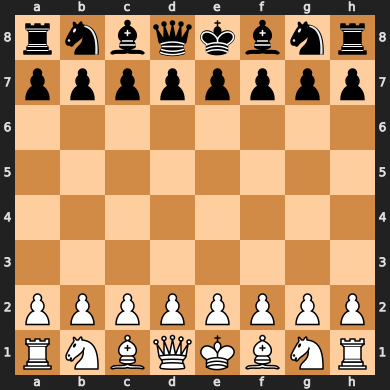

In [739]:
board

In [766]:
engine.analyse(board, limit, multipv='5')

[{'string': 'NNUE evaluation using nn-6877cd24400e.nnue enabled',
  'depth': 21,
  'seldepth': 31,
  'multipv': 1,
  'score': PovScore(Cp(+37), WHITE),
  'nodes': 5093698,
  'nps': 5088609,
  'tbhits': 0,
  'time': 1.001,
  'pv': [Move.from_uci('e2e4'),
   Move.from_uci('e7e6'),
   Move.from_uci('d2d4'),
   Move.from_uci('d7d5'),
   Move.from_uci('b1c3'),
   Move.from_uci('g8f6'),
   Move.from_uci('e4e5'),
   Move.from_uci('f6d7'),
   Move.from_uci('f2f4'),
   Move.from_uci('c7c5'),
   Move.from_uci('g1f3'),
   Move.from_uci('b8c6'),
   Move.from_uci('c1e3'),
   Move.from_uci('a7a6'),
   Move.from_uci('d1d2'),
   Move.from_uci('b7b5'),
   Move.from_uci('a2a3'),
   Move.from_uci('d8a5'),
   Move.from_uci('h2h4'),
   Move.from_uci('b5b4'),
   Move.from_uci('c3e2'),
   Move.from_uci('b4a3'),
   Move.from_uci('d2a5')],
  'hashfull': 39},
 {'depth': 21,
  'seldepth': 31,
  'multipv': 2,
  'score': PovScore(Cp(+33), WHITE),
  'nodes': 5093698,
  'nps': 5088609,
  'tbhits': 0,
  'time': 1.001

In [767]:
board.push_san('d4')

Move.from_uci('d2d4')

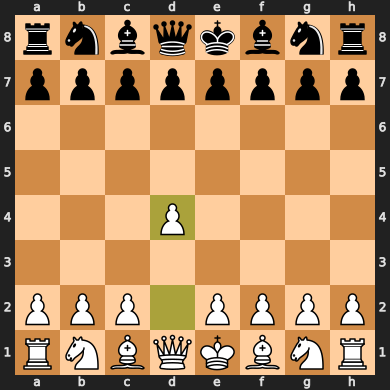

In [768]:
board

In [769]:
engine.analyse(board, limit, multipv='5')
# engine.analyse(board, limit)

[{'string': 'NNUE evaluation using nn-6877cd24400e.nnue enabled',
  'depth': 20,
  'seldepth': 24,
  'multipv': 1,
  'score': PovScore(Cp(-25), BLACK),
  'nodes': 4821616,
  'nps': 4816799,
  'tbhits': 0,
  'time': 1.001,
  'pv': [Move.from_uci('g8f6'),
   Move.from_uci('c2c4'),
   Move.from_uci('c7c6'),
   Move.from_uci('b1c3'),
   Move.from_uci('d7d5'),
   Move.from_uci('c4d5'),
   Move.from_uci('c6d5'),
   Move.from_uci('c1f4'),
   Move.from_uci('e7e6'),
   Move.from_uci('e2e3'),
   Move.from_uci('f8d6'),
   Move.from_uci('f4d6'),
   Move.from_uci('d8d6'),
   Move.from_uci('a1c1'),
   Move.from_uci('e8g8'),
   Move.from_uci('f1d3'),
   Move.from_uci('b8c6'),
   Move.from_uci('g1f3'),
   Move.from_uci('c8d7'),
   Move.from_uci('e1g1'),
   Move.from_uci('f8c8'),
   Move.from_uci('f1e1')],
  'hashfull': 36},
 {'depth': 20,
  'seldepth': 28,
  'multipv': 2,
  'score': PovScore(Cp(-32), BLACK),
  'nodes': 4821616,
  'nps': 4816799,
  'tbhits': 0,
  'time': 1.001,
  'pv': [Move.from_uci('

In [778]:
engine.analyse(board, limit, multipv='5', info=4)
# engine.analyse(board, limit)

[{'string': 'NNUE evaluation using nn-6877cd24400e.nnue enabled',
  'depth': 23,
  'seldepth': 30,
  'multipv': 1,
  'nodes': 5044834,
  'nps': 5039794,
  'tbhits': 0,
  'time': 1.001,
  'pv': [Move.from_uci('d7d5'),
   Move.from_uci('c2c4'),
   Move.from_uci('e7e6'),
   Move.from_uci('g1f3'),
   Move.from_uci('b8d7'),
   Move.from_uci('c4d5'),
   Move.from_uci('e6d5'),
   Move.from_uci('c1f4'),
   Move.from_uci('g8f6'),
   Move.from_uci('e2e3'),
   Move.from_uci('f6h5'),
   Move.from_uci('f4g5'),
   Move.from_uci('f8e7'),
   Move.from_uci('g5e7'),
   Move.from_uci('d8e7'),
   Move.from_uci('b1c3'),
   Move.from_uci('c7c6'),
   Move.from_uci('f1e2'),
   Move.from_uci('e8g8'),
   Move.from_uci('e1g1'),
   Move.from_uci('h5f6'),
   Move.from_uci('e2d3'),
   Move.from_uci('f6e4'),
   Move.from_uci('d1c2'),
   Move.from_uci('d7f6'),
   Move.from_uci('a2a4'),
   Move.from_uci('a7a5'),
   Move.from_uci('f3e5'),
   Move.from_uci('e4c3')],
  'hashfull': 33},
 {'depth': 23,
  'seldepth': 34,
  

In [770]:
engine.

AttributeError: 'SimpleEngine' object has no attribute 'InfoDict'

In [721]:
df_2021_2017_titled_distinv.moves[0]

['d4',
 'c5',
 'd5',
 'g6',
 'Nf3',
 'Bg7',
 'e3',
 'Nf6',
 'Be2',
 'O-O',
 'b3',
 'b5',
 'Bb2',
 'Bb7',
 'a3',
 'Nxd5',
 'c4',
 'Bxb2',
 'Ra2',
 'Nc3',
 'Qc2',
 'Nxa2']

In [691]:
# engine.analyse(board, limit)
# engine.analyse(board, limit)

In [593]:
# engine = chess.engine.SimpleEngine.popen_uci(stockfish)
# movetimesec = 2
# depth = 20
# def evaluate_game(game, engine, limit=chess.engine.Limit(time=movetimesec, depth=depth)):
#     board = game.board()
#     info = engine.analyse(board, limit=limit)

-----

### Testing interrupting a loop

In [620]:
# b = []
# i=0

# while True:
#     b.append(i)
#     i+=1
    


In [619]:
# b

In [618]:
# len(b) # 85092918

----

### Putting looping pickling in getting evaluation loops and ensuring time cap on how long engine can evaluate for

In [588]:
sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
        depth=5,
        parameters={
            "Threads": 4,
            "Hash": 1024,
            "MultiPV": 1,
            "Skill Level": 20,
            "Debug Log File": 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt'
#             , "SyzygyPath": ' '
            
            }
        )

In [608]:
sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
        depth=20,
        parameters={
            "Threads": 4,
            "Hash": 1024,
            "MultiPV": 1,
            "Skill Level": 20,
            "Debug Log File": 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt',
            "Move Overhead": 1,
            "Slow Mover": 20
#             , "SyzygyPath": ' '
            
            }
        )

In [545]:
# sf_._set_option("SyzygyPath", " ")

In [593]:
# engine = chess.engine.SimpleEngine.popen_uci(stockfish)
# movetimesec = 2
# depth = 20
# def evaluate_game(game, engine, limit=chess.engine.Limit(time=movetimesec, depth=depth)):
#     board = game.board()
#     info = engine.analyse(board, limit=limit)

In [554]:
# sf_.set_fen_position('4k3/8/8/5B2/r2BK3/6N1/8/8 w - - 0 1')

# sf_.get_evaluation() # {'type': 'cp', 'value': 183}

In [477]:
# import time

# t = time.time()

# b = []
# for i in range(1000):
#     b.append(i**2+np.random.randint(1, 100))

# t1 = time.time()

# c = []
# for i in range(1000):
#     c.append(i**2+np.random.randint(1, 100))

# t2 = time.time()

# total=t1-t
# total

# t2-t1

# times_ = []
# t=time.time()
# times_.append(t)

# b=[]
# for j in range(1000):
#     for i in range(1000):
#         b.append(i**2+np.random.randint(1, 100))
#     times_.append(time.time())

    

# times_[0:3]
# # len(b)
# # len(times_)

In [480]:
100 % 10 == 0 

True

In [505]:
def get_evaluations(game):
    # Loop for moves in a single game
    evaluations_ = []
    game_count=0
    sf_.set_position()
    board=chess.Board()
    for move in game:
        evalution_ = sf_.get_top_moves()
        move_ = board.push_san(move)
        sf_.make_moves_from_current_position([move_])

        evaluations_.append(evalution_)
    
    
    return evaluations_
    
    

In [506]:
def get_all_evaluations(df):
    list_of_all_evaluations = [
        get_evaluations(game[0]) for game in zip(df.moves)
    ]
    return list_of_all_evaluations

In [ ]:
def get_all_evaluations_saving(df):
    for game in zip(df_2021_2017_titled_distinv)

In [516]:
for game in zip(df_2021_2017_titled_distinv[0:10].moves):
    print(game[0])

['d4', 'c5', 'd5', 'g6', 'Nf3', 'Bg7', 'e3', 'Nf6', 'Be2', 'O-O', 'b3', 'b5', 'Bb2', 'Bb7', 'a3', 'Nxd5', 'c4', 'Bxb2', 'Ra2', 'Nc3', 'Qc2', 'Nxa2']
['d4', 'g6', 'Bg5', 'Bg7', 'Nc3', 'd6', 'Qd2', 'h6', 'Bh4', 'Nf6', 'e4', 'g5', 'Bg3', 'Nh5', 'O-O-O', 'e6', 'Be2', 'Nxg3', 'hxg3', 'Qe7', 'f4', 'Nc6', 'd5', 'Nb4', 'a3', 'Bxc3', 'bxc3', 'Na6', 'Bxa6', 'bxa6', 'fxg5', 'h5', 'Nf3', 'e5', 'Rh4', 'Bg4', 'Rdh1', 'Rg8', 'Rxh5', 'Bxh5', 'Rxh5', 'Rb8', 'Qd3', 'Rb6', 'Qe3', 'c6', 'Nh4', 'cxd5', 'exd5', 'Qb7', 'c4', 'Rb1+', 'Kd2', 'Rh1', 'Rh6', 'Qe7', 'Rf6', 'Rh2', 'Nf5', 'Rxg2+', 'Kc3', 'Qxf6', 'gxf6', 'Kd7', 'Qxa7+', 'Kc8', 'Nxd6+', 'Kd8', 'Qe7#']
['d4', 'e6', 'e4', 'd5', 'Nd2', 'Be7', 'Bd3', 'Nf6', 'Ngf3', 'c5', 'dxc5', 'Bxc5', 'O-O', 'O-O', 'Qe2', 'Nc6', 'c3', 'Re8', 'e5', 'Nd7', 'Nb3', 'Be7', 'Nbd4', 'Qc7', 'Bf4', 'h6', 'Bg3', 'Qb6', 'Rfe1', 'Bc5', 'Rad1', 'f5', 'exf6', 'Nxf6', 'Bb1', 'Bd7', 'Ne5', 'Nxe5', 'Bxe5', 'Rf8', 'Qc2', 'Ne4', 'f3', 'Rf5', 'fxe4', 'Rxe5', 'exd5', 'Bxd4+', 'cxd4', 'Rxe1+

In [ ]:
    
    # keep track of how many games have been analysed
    game_count+=1
    
    if game_count % 10 == 0:
        print(f'{game_count} games have been analyzed')
        joblib.dump(evaluations_, f'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/{game_count}_evaluated')
    

In [484]:
# testing

In [511]:
df_2021_2017_titled_distinv.moves[0];
test_ = [game for game in df_2021_2017_titled_distinv.moves]

In [514]:
[get_evaluations(game[0]) for game in zip(df_2021_2017_titled_distinv[0:10].moves)]

[[[{'Move': 'd2d4', 'Centipawn': 44, 'Mate': None},
   {'Move': 'e2e4', 'Centipawn': 39, 'Mate': None},
   {'Move': 'c2c4', 'Centipawn': 31, 'Mate': None},
   {'Move': 'g1f3', 'Centipawn': 25, 'Mate': None},
   {'Move': 'e2e3', 'Centipawn': 14, 'Mate': None}],
  [{'Move': 'd7d5', 'Centipawn': 25, 'Mate': None},
   {'Move': 'g8f6', 'Centipawn': 26, 'Mate': None},
   {'Move': 'c7c6', 'Centipawn': 34, 'Mate': None},
   {'Move': 'e7e6', 'Centipawn': 37, 'Mate': None},
   {'Move': 'c7c5', 'Centipawn': 46, 'Mate': None}],
  [{'Move': 'd4d5', 'Centipawn': 67, 'Mate': None},
   {'Move': 'e2e4', 'Centipawn': 42, 'Mate': None},
   {'Move': 'd4c5', 'Centipawn': 33, 'Mate': None},
   {'Move': 'c2c4', 'Centipawn': 32, 'Mate': None},
   {'Move': 'e2e3', 'Centipawn': 27, 'Mate': None}],
  [{'Move': 'g7g6', 'Centipawn': 59, 'Mate': None},
   {'Move': 'd7d6', 'Centipawn': 59, 'Mate': None},
   {'Move': 'g8f6', 'Centipawn': 63, 'Mate': None},
   {'Move': 'e7e6', 'Centipawn': 93, 'Mate': None},
   {'Move

In [560]:
# df_2021_2017_titled_distinv.shape # (87982, 18)

# drop_no_move_games(df_2021_2017_titled_distinv).shape # (87871, 18)

In [555]:
game_0 = get_evaluations(df_2021_2017_titled_distinv.moves[0]) # powerful-fish took 1m 16.9s on laptop

In [561]:
# len(game_0) # 22

22

In [487]:
games_0_to_101 = get_all_evaluations(df_2021_2017_titled_distinv[0:101])

In [492]:
games_0_to_101[0][0]
# == game_0

[{'Move': 'e2e4', 'Centipawn': 42, 'Mate': None},
 {'Move': 'g1f3', 'Centipawn': 42, 'Mate': None},
 {'Move': 'c2c4', 'Centipawn': 40, 'Mate': None},
 {'Move': 'd2d4', 'Centipawn': 38, 'Mate': None},
 {'Move': 'g2g3', 'Centipawn': 25, 'Mate': None}]

In [496]:
game_0[0]

[{'Move': 'e2e4', 'Centipawn': 48, 'Mate': None},
 {'Move': 'g1f3', 'Centipawn': 36, 'Mate': None},
 {'Move': 'c2c4', 'Centipawn': 34, 'Mate': None},
 {'Move': 'd2d4', 'Centipawn': 25, 'Mate': None},
 {'Move': 'e2e3', 'Centipawn': 24, 'Mate': None}]

-----

### Remove elos, retrain models

-------

## Functions to write:

In [ ]:
# Write function that compares ply count to 

In [ ]:
# Write function to check that the length of emt matches ply

In [ ]:
# Write function that checks all the emt have 'emt' in them and not 'clk'

In [ ]:
# Write function to check that none of the emt values are missing

-----

## Modeling

------

- For now, as I don't have engine evaluations, how do I go about making a classification when it isn't immediately binary i.e. 3 options: white cheating, black cheating, no cheating. 

- Do all the games start from the starting position?
- Does the game being an otb or online game influence how likely a win/draw is? 
- Is there any noticeable difference in patterns across different elo categories?
- What is the distribution of elo? Across humans and computers? How do I take into account the same player and that their elo is changing over time? Do I treat each as independent? 
- What is the distribution of game length? Does it vary by elo? (Probably yes ?)
- What is the distribution of computer-ELO? Are there bots that are low elo? Could this be because people are able to 'set' the strength of the computer opponent? If so this could mess up predictions, think about whether or not they should be removed, maybe they can be kept as 'test-cases' of how well we can predict 'cheaters' who cheat at low-elo.
- Does the dataset tell me hwo the game ended? (I.e. resignation, checkmate, running out of time etc.)

# Considerations:

Using ELO difference/metric as a feature in predicting expected outcome of game.
- Using opening played as a feature in predicting if cheater or not.
- Use an engine to evaluate sequences of chess moves played in a game to learn average centipawn loss/gain, the centipawn loss/gain for each move, the number of innacuracies, mistakes, blunders. 
- How many opening moves to eliminate?



- Lichess games offer 

# Notes from Data Skeptic:

- Humans tend to make little blunders all the time "oh I didn't notice this idea, luckily my position still holds".
- Computers tend to keep their options open, X was able to demonstrate that humans, if they see an attack, will try to play it and force an early crisis in the game.
- In aggregates of 100-200 moves, X believes you can then determine with confidence if someone was cheating.
- "Distance metric (of two probabilities?)" : "You can't just say deterministically what is the computer's move. It depends on many variables such as the depth of search, [pv or multi-pv], the identity of the computer program, even how much hash memory you've given it. There's a variation there (i.e. a probability distribution). The human being is a distribution, often fallable distribution, of options."
- Originally going to use 'fidelity' which is a distance measure between distributions, which often comes up in computational physics. A former student recommended the 'Yensen-Shannon divergence (?)' which would solve a problem of 'Koblak-Leibler (?)' divergence of being too hair trigger in the treatment of blunders but it lacked other properties which X needed. 
- Wound up doing something 'highly elementary': maps given analysis of positions in a game, and parameters denoting the strength and particulars of the human player, he maps each chess move to probabilities, as if he were painting that move on the faces of many sided dice. And then he treats the chess position as a roll of those dice, so for this player, there's a 49% chance of selecting Ng5, 27% for Qg4, and so on down the line. After that, he can tap into the very simple stats theory of Bernoulli distributions (rolls of dice, flips of coins), and not only project the expected mean number of agreements, but also the projected variance, from the Bernoulli distribution theory, and thereby project confidence intervals, and since he's estimating a sample mean, the CLT comes into play, so he's working with a normal distribution and can use a z-score framework for his statistical projections. 
- If there is a clear stand-out move (e.g. only one move that keeps you alive in the position) then not only will the computer find it, it is highly likely that the good human player will find it. Whereas, even if you have just 10 moves in a game, where each move there were 4 highly reasonable options, which X's model would assign probabilities say between 20-25% each, and you consistently select the option that shows as preferred in X's computer test (...something about Modulo and distribution), if you match the computer's preferred move for 10 or more moves in a row, that a mllion to one probability.
- Two modes of chess analysis with comp: multi-pv mode where comp has equal depth of search to all reasonable options in a position, single-pv is regular playing mode where computer focuses its resources on the move it thinks best and one or two competing moves. A lot of the art of practical computers playig against each others is how quickly can they prune away the sub-optimal moves. For his model, he needs to know the values of all the reasonalbe moves that the player might be considering, and the general landscape or shape of the position (either forcing or lots of options etc.).
- For the training set, he has 10,000 games of multi-pv data, he took those games wehre each player is at one of the century points in the chess rating; for each of the levels above 2000 (Expert) he exhaustively chose games where both players were within 10 or so of those century points, run those games and he has his training data for yay-rated players. He is then therefor able to relate his two main model parameters to strength on that elo scale. Supplementing this he has a vast amount of single-pv (basically every top rated game in the recorded history of chess - over 200,000 games total). 
- He also routinely screens about 80,000 games out of the world's top events every year (codified as screening mode - he can get a first look at the play and relate it to the distributions of tens of thousands of performances of players at all ranks to see how much of an apparent outlier it is. 
- About a surprise winner: when he ran the screening test the player was on the edge of the red zone, but when he ran the full test based on the training data (multi-pv mode) it gave a z-score under 1.5 (the minimum was 2 for any kind of statistical significance) meaning it was unlikely that the player was cheaitng (his GM opponent was over-eager in trying to win and ended up losing). 
- He talks a little about how the arbiters, given their chess domain knowledge, likely made the right decision as they would have been able to see the situation on the ground (i.e. seen the critical positions, how the GM was winning, then made a mistake etc.). 
- Up until about 2+ years ago, the highest z-score he got in cases he was involved in was about 3.5, which corresponds to 4,300-to-1 odds against a Null hypothesis. Although very important, what it really means is that's the incidence of such a deviation occuring naturally among non-cheating players. Every week there are more than 1000 players taking part in tournaments around the globe, significant enough tto be aggregated on 'the week in chess'/'the weekend chess' by Mike 'Crowder'(?). You have to be aware of how your sample was selected or if there were any other factors which brought it to your attention apart from people going over the games with computers and noting a high correspondence. He believes that there has to be independent evidence. 
- [Section talking about comparing the quality of moves in a player's games in a tournament where there were known to be transmissions and expected-transmissionless games and how the differnce in quality of moves was about 3200 compared to 2550, so this was another indicator that the player was cheating.]
- Up until Jan 2013 he did not get any z-scores above 3.5, but then suddenly z-scores above 5 (even closer to 6) ...

# Appendix:

## Figuring out how to get emt:

In [ ]:
pgn = open("data/raw_data/2022/ficsgamesdb_search_262781.pgn")
game = chess.pgn.read_game(pgn)

In [ ]:
print(game)

%emt refers to the time used on a move. %clk refers to actual clock time. 

From the pgn we can see time spent per move. 

In [ ]:
type(game)

In [ ]:
game.mainline()

In [ ]:
game.board().san(game.variation(0).move)

In [ ]:
game.headers

In [ ]:
game.mainline()

In [ ]:
for node in game.mainline():
    print(node.move, node.emt(), node.clock())
    print(node.comment)

In [ ]:
help(game)

In [ ]:
# seems like the emt is in the game.comment

In [ ]:
game.variation(0).comment

In [ ]:
teste_ = pd.read_json("data/raw_data/json/2017/ficsgamesdb_search_262781.json")

In [ ]:
teste_.moves

In [ ]:
teste_.loc[0];

In [ ]:
teste_.columns

## Making df column and dtype helper:

In [ ]:
df.columns

In [ ]:
columns = list(df.columns)
columns

In [ ]:
list(df.dtypes);

In [ ]:
df.dtypes.reset_index().head()

In [ ]:
df.dtypes.reset_index().loc[:,0]

In [ ]:
df.WhiteElo.dtype == np.int64

In [ ]:
df.WhiteElo.dtype == 'int64'

In [ ]:
df.Event.dtype == 'O'

In [ ]:
df.Date.dtype == '<M8[ns]'

In [ ]:
df.Date.dtype == 'datetime64[ns]'

In [ ]:
#     def dtype_checker(df, schema):
#         wrong_dtypes = [[i, j] for i, j in schema.items() if i in df.columns and df[i].dtype!=j]
#         if len(wrong_dtypes)!=0:
#             for row in [f'Column {k[0]} does not match datatype {k[1]}' for k in wrong_dtypes]:
#                 print(row)
#             return False
#         else:
#             return True

In [ ]:
#     expected_schema = {
#         'Event': 'object',
#         'Site': 'object',
#         'Date': 'datetime64[ns]',
#         'Round': 'object',
#         'White': 'object',
#         'Black': 'object',
#         'Result': 'object',
#         'BlackClock': 'object',
#         'BlackElo':  'int64',
#         'BlackIsComp': 'object',
#         'BlackRD': 'float64',
#         'ECO': 'object',
#         'FICSGamesDBGameNo':  'int64',
#         'PlyCount':  'int64',
#         'Time': 'object',
#         'TimeControl': 'object',
#         'WhiteClock': 'object',
#         'WhiteElo':  'int64',
#         'WhiteRD': 'float64',
#         'emt': 'object',
#         'moves': 'object',
#         'WhiteIsComp': 'object'  
#     }

In [ ]:
# dtype_checker(df, expected_schema)

In [ ]:
# def schema_checker(df, cols):
#     missing_cols = [i for i in cols if i not in df.columns]
#     if len(missing_cols)!=0:
#         for col in [f'Column {i} not found' for i in missing_cols]:
#             print(col)
#         return False
#     else:
#         return True

In [ ]:
# schema_checker(df, expected_schema.keys())

In [ ]:
# df_wrong = df.copy().rename(columns={'BlackRD': 'Wrongs'})

In [ ]:
# schema_checker(df_wrong, expected_schema.keys())

## Making XIsComp helper:

In [ ]:
# def change_comp_columns(df):
#     ## make copy df

#     nocomp_df = df.copy()
    
#     ## check number of unique in blackiscomp and whiteiscomp (should be 2)
#     assert all([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']]), 'More than two unique values in a XIsComp column (including nan)'
    
#     ## check one of the unique values are 'Yes'
#     assert all(['Yes' in nocomp_df[x].unique() for x in ['WhiteIsComp', 'BlackIsComp']]), 'Missing "Yes" in one of the XIsComp column'

#     ## assign 1 and 0 to blackiscomp and whiteiscomp

#     nocomp_df['WhiteIsComp'] = np.where(nocomp_df['WhiteIsComp']=='Yes', np.int8(1), np.int8(0))
#     nocomp_df['BlackIsComp'] = np.where(nocomp_df['BlackIsComp']=='Yes', np.int8(1), np.int8(0))

#     ## make new 'nocomp' column which depends on blackiscomp==1 and whiteiscomp==1

#     nocomp_df['NoComp'] = np.where(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])==[0, 0], np.int8(1), np.int8(0))
    
#     return nocomp_df

In [ ]:
# nocomp_df_test = hp.change_comp_columns(df)

# # validating the shape is (2, 0) if there are only games with cheaters (i.e. XIsComp==1)
# nocomp_df_test[['BlackIsComp', 'WhiteIsComp', 'NoComp']].groupby(['BlackIsComp', 'WhiteIsComp', 'NoComp']).count()

# nocomp_df_test[['BlackIsComp', 'WhiteIsComp', 'NoComp']].groupby([
#     'BlackIsComp', 'WhiteIsComp', 'NoComp']).count().shape[0]; # 2


# # validating the shape is (3, 0) if there is at least one entry that is NoComp==1
# nocomp_df_test_2  = nocomp_df_test.copy()
# nocomp_df_test_2.loc[0,['BlackIsComp', 'WhiteIsComp', 'NoComp']] = [0, 0, 1]
# nocomp_df_test_2[['BlackIsComp', 'WhiteIsComp', 'NoComp']].iloc[0]
# nocomp_df_test_2[['BlackIsComp', 'WhiteIsComp', 'NoComp']].groupby(['BlackIsComp', 'WhiteIsComp', 'NoComp']).count()

# nocomp_df_test_2[['BlackIsComp', 'WhiteIsComp', 'NoComp']].groupby([
#     'BlackIsComp', 'WhiteIsComp', 'NoComp']).count().shape[0]; # 3

In [ ]:
# make 'nocomp' column:

## make copy df

nocomp_df = df.copy()

## check number of unique in blackiscomp and whiteiscomp (should be 2)

# white_comp_unique_num = nocomp_df.WhiteIsComp.nunique(dropna=False)
# black_comp_unique_num = nocomp_df.BlackIsComp.nunique(dropna=False)
# comp_unique_num = [nocomp_df[x].nunique(dropna=False) for x in ['WhiteIsComp', 'BlackIsComp']]
# print(comp_unique_num) # [2, 2]
# print(all(comp_unique_num))
# comp_unique_num_is2 = np.array([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']]).all()
# assert np.array([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']]).all()==True, 'More than two unique values in a XIsComp column (including nan)'
# print(comp_unique_num_is2)
comp_unique_num_is2 = all([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']])
# print(comp_unique_num_is2)

# bla = np.array([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']])
# bla[0]=False
# print(all(bla)) # False


## check one of the unique values are 'Yes'

has_yes_list = ['Yes' in nocomp_df[x].unique() for x in ['WhiteIsComp', 'BlackIsComp']]
# print(has_yes_list) # [True, True]
has_yes = all(has_yes_list)
# print(has_yes)

## assign 1 and 0 to blackiscomp and whiteiscomp

# nocomp_df['WhiteIsComp'] = nocomp_df['WhiteIsComp'].apply(lambda x: np.int8(1) if x=='Yes' else np.int8(0))
# nocomp_df['BlackIsComp'] = nocomp_df['BlackIsComp'].apply(lambda x: np.int8(1) if x=='Yes' else np.int8(0))

nocomp_df['WhiteIsComp'] = np.where(nocomp_df['WhiteIsComp']=='Yes', np.int8(1), np.int8(0))
nocomp_df['BlackIsComp'] = np.where(nocomp_df['BlackIsComp']=='Yes', np.int8(1), np.int8(0))


#---#

## make new 'nocomp' column which depends on blackiscomp==1 and whiteiscomp==1

# fastest is:
nocomp_df['NoComp'] = np.where(next(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))==(0, 0), 
                               np.int8(1),
                               np.int8(0))

# testing was done to compare speeds


In [ ]:
# compare speed of np.array(...).all() and all([...])

# all([...]) marginally faster

# # %%timeit # 1.58 ms ± 55.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
# nocomp_df = df.copy()
# comp_unique_num_is2 = np.array([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']]).all()
# comp_unique_num_is2

# # %%timeit # 1.51 ms ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
# nocomp_df = df.copy()
# comp_unique_num_is2 = all([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']])
# comp_unique_num_is2

In [ ]:
# Compare np.where and df.apply speed:

# # timing np.where
# nocomp_df = df.copy()
# nocomp_df['WhiteIsComp'] = np.where(nocomp_df['WhiteIsComp']=='Yes', np.int8(1), np.int8(0))
# nocomp_df['BlackIsComp'] = np.where(nocomp_df['BlackIsComp']=='Yes', np.int8(1), np.int8(0))


#-----#

# any([np.int8(0), np.int8(1)]) # True

# zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']) # <zip at 0x2ac85d24c40>

# for element in zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']):
#     print(element)

# [np.int8(0) if any(element) else np.int8(1) for element in zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])]

# pd.Series([np.int8(1) if all(element) else np.int8(0) for element in zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])])

# nocomp_df['NoComp'] = [np.int8(0) if any(element) else np.int8(1) for element in zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])]

# nocomp_df['NoComp'].any() # False

# nocomp_df['NoComp'] = np.where(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])==[0, 0], np.int8(1), np.int8(0))
# np.int8(0)==0 # True
# np.int8(1)==1 # True

# nocomp_df['NoComp'].any() # False 

# nocomp_df['WhiteIsComp']==1 # Series of True and False

#------#

# # %%timeit # 54.6 ms ± 420 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
# # timing df.apply()
# nocomp_df = df.copy()
# nocomp_df['WhiteIsComp'] = nocomp_df['WhiteIsComp'].apply(lambda x: np.int8(1) if x=='Yes' else np.int8(0))
# nocomp_df['BlackIsComp'] = nocomp_df['BlackIsComp'].apply(lambda x: np.int8(1) if x=='Yes' else np.int8(0))

In [ ]:
# # Comparing 3 methods for making NoComp column (on Muninn):

nocomp_df = df_2018_test.copy()
nocomp_df['WhiteIsComp'] = np.where(nocomp_df['WhiteIsComp']=='Yes', np.int8(1), np.int8(0))
nocomp_df['BlackIsComp'] = np.where(nocomp_df['BlackIsComp']=='Yes', np.int8(1), np.int8(0))

# #--#

In [ ]:
# # %%timeit # 156 ms ± 517 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

# # .apply()

# nocomp_df['NoComp'] = nocomp_df.apply(lambda x: np.int8(1) if (x['WhiteIsComp']!=1 and \
#                                                                x['BlackIsComp']!=1) else np.int8(0), axis=1)

In [ ]:
# apply_ = nocomp_df['NoComp'].copy()

In [ ]:
# apply_;

In [ ]:
#--#

In [ ]:
# nocomp_df['NoComp'][0:5] # looks good

In [ ]:
# # %%timeit # 49.5 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

# # list comprehension using 'for element in zip'

# nocomp_df['NoComp'] = [np.int8(1) if element==(0, 0) else np.int8(0) for element in \
#                        zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])]

# # nocomp_df['NoComp'] = [np.int8(0) if any(element) else np.int8(1) for element in \
# #                        zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])]

# # [element for element in \
# #  zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])]

In [ ]:
# listcompforzip_ = nocomp_df['NoComp'].copy()

In [ ]:
# listcompforzip_;

In [ ]:
#--#

In [ ]:
# nocomp_df['NoComp'] # looks good

In [ ]:
# # %%timeit # 84.8 µs ± 689 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

# # np.where(next(zip()))==(0, 0) 


# # DON'T WORK:
# # nocomp_df['NoComp'] = np.where(list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))==(0, 0), # [0, 0] doesn't work
# #                                np.int8(1),
# #                                np.int8(0)) # doesn't work

# # nocomp_df['NoComp'] = np.where(np.array(list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))).flat==[0, 0], 
# #                                np.int8(1),
# #                                np.int8(0))


# # DOES WORK:
# nocomp_df['NoComp'] = np.where(next(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))==(0, 0), 
#                                np.int8(1),
#                                np.int8(0))

# #-#

# # both of: 
# # # np.where(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])==(0, 0), 1, 0)

# # # np.where(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])==[0, 0], 1, 0)
# # return array(0), this is why 'list' is used


In [ ]:
# len(list(zip(*(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])))))
# list(zip(*(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))))
# list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))
# #==(0, 0)
# np.array(list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])), ndmin=1).shape

# next(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))

In [ ]:
# list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))
# [(0, 0),
#  (0, 0),
#  (0, 0),
#  (0, 0),
#  (0, 0),
#  (0, 0),....

In [ ]:
# list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))[0]==(0, 0)

In [ ]:
# bla = zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])
# next(bla)
# next(bla)==(0, 0) # True

In [ ]:
# wherenextzip_ = nocomp_df['NoComp'].copy()

In [ ]:
wherenextzip_;

In [ ]:
#--#

In [ ]:
# nocomp_df['NoComp'] # looks good

In [ ]:
# # %%timeit # 309 µs ± 3.63 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

# # #np.where(df[['a', 'b']].values==[0, 0])

# nocomp_df['NoComp'] = np.where((nocomp_df['WhiteIsComp']==0)*(nocomp_df['BlackIsComp']==0),
#                                np.int8(1), np.int8(0))

In [ ]:
# wheredf_ = nocomp_df['NoComp'].copy()

In [ ]:
wheredf_;

In [ ]:
#--#

In [ ]:
# nocomp_df['NoComp'] # looks good

In [ ]:
#--#

In [ ]:
all(wheredf_==wherenextzip_) # True

In [ ]:
all(listcompforzip_==wherenextzip_) # True

In [ ]:
all(apply_==wherenextzip_) # True

In [ ]:
#--#

In [ ]:
#------#

In [ ]:
# trying to do both columns in one apply:

# nocomp_df = df.copy()
# nocomp_df[['WhiteIsComp', 'BlackIsComp']] = nocomp_df[['WhiteIsComp', 'BlackIsComp']].apply(lambda x: [np.int8(1) if x.loc[y]=='Yes' else np.int8(0) for y in ['WhiteIsComp', 'BlackIsComp']], axis=1)

# nocomp_df[['WhiteIsComp', 'BlackIsComp']] = nocomp_df.apply(lambda x: [np.int8(1) if x[y]=='Yes' else np.int8(0) for y in ['WhiteIsComp', 'BlackIsComp']], axis=1)

In [ ]:
# nocomp_df = df.copy()
# nocomp_df[['WhiteIsComp', 'BlackIsComp']] = nocomp_df[['WhiteIsComp', 'BlackIsComp']].apply(
#     lambda x: [np.int8(1) for y in ['WhiteIsComp', 'BlackIsComp'] if x.loc[y]=='Yes' else np.int8(0)], axis=1)

In [ ]:
# nocomp_df = df.copy()
# nocomp_df[['WhiteIsComp', 'BlackIsComp']] = nocomp_df[['WhiteIsComp', 'BlackIsComp']].apply(
#     lambda x: np.int8(1) if x=='Yes' else np.int8(0),
#     axis=1)

In [ ]:
# nocomp_df = df.copy()
# nocomp_df[['WhiteIsComp', 'BlackIsComp']] = [row_value.apply(lambda x: np.int8(1) if x=='Yes' else np.int8(0)) for ]



# nocomp_df[['WhiteIsComp', 'BlackIsComp']].apply(
#     lambda x: np.int8(1) if x=='Yes' else np.int8(0),
#     axis=1)

In [ ]:
# type(df.loc[0]) # Series
# display(df.loc[0])

In [ ]:
# row = df.loc[0]
# row.loc['ECO']

In [ ]:
# test = row[['BlackIsComp', 'WhiteIsComp']].copy()
# type(test) # series

In [ ]:
# row[['BlackIsComp', 'WhiteIsComp']] = ['yes', 'no'] # SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame

In [ ]:
# row[['BlackIsComp', 'WhiteIsComp']] 

## Editing Chess NaN Checker helper:

In [ ]:
# def chess_nan_checker(df, list_of_cols=['BlackIsComp', 'WhiteIsComp']): 
#     '''
#     checks for nan values in the dataframe

#     Args:
#         df (DataFrame): Pandas dataframe
#         list_of_cols (List): List of strings indicating what columns to ignore

#     Returns:
#         summary (String): returns a summary of nan values
#     '''

#     assert all([col in df.columns for col in list_of_cols]), f'Passed dataframe does not contain {list_of_cols}'   
    
#     # are there any nan values?
#     any_nan = all(
#         df[[x for x in df.columns if x not in list_of_cols]].notna()
#     ) # returns True if all values are not NaN
#     if any_nan == True:
#         return print(f"This dataframe has 0 NaN values in columns: {list(df[[x for x in df.columns if x not in list_of_cols]].columns)}")
        
#     # how many?
#     nan_series = df.isna().sum()
#     nan_num = nan_series.sum()

#     # which variables do they come from

#     # list_of_nan_column_loc = \
#     #     [ [df[column], df[column].isna().sum()] for \
#     #         column in df.columns ]

#     nan_cols = list(nan_series[nan_series > 0].index)

#     # any variables with more than 50% of data missing?
#     big_nan_cols = list(nan_series[nan_series/len(df) > 0.5])
    
#     #summary can be all the info about nans
#     summary = f'This dataframe has {nan_num} NaN values'

#     if len(nan_cols) > 0:
#         summary += f'\nThe NaN values come from: {nan_cols}'

#     if len(big_nan_cols) > 0:
#         summary += f'\nMore than 50% of the data is missing from: {big_nan_cols}'

#     return print(summary)

In [ ]:
# Testing assertion error of nan_checker

# test_list_of_cols = df.copy()
# test_list_of_cols.drop(columns='BlackIsComp', inplace=True)

# list_of_cols = ['BlackIsComp', 'WhiteIsComp']

# assert all([col in test_list_of_cols.columns for col in list_of_cols]), f'Passed dataframe does not contain {list_of_cols}'

# any_nan = all(
#     df[[x for x in test_list_of_cols.columns if x not in list_of_cols]].notna()
# ) # returns True if all values are not NaN
# if any_nan == True:
# #     return 
#     print(f"This dataframe has 0 NaN values in columns: {list(test_list_of_cols[[x for x in df.columns if x not in list_of_cols]].columns)}")

## Figuring out how to get average time per ply (average emt) for each player helper:

------

## Checking PlyCount matches length of moves

In [ ]:
# Testing:
#--#

In [ ]:
# np.where(next(zip(...,...))) way: [from previous tinkering]
#
#
# nocomp_df['NoComp'] = np.where(next(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))==(0, 0), 
#                                np.int8(1),
#                                np.int8(0))
#
# but maybe it doesn't work here; how can I check if each part is equal to it's respective counterpart?
# by calling the 'next(..)' twice and indexing each one?
# ==> not possible as it only ever takes the first component of the zip

# need to know what the next(zip(...,...)) returns (i.e. what does indexing only once give? is it a list?)...
# ...done below

In [ ]:
# test_ = next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))
# display(test_)
# display(test_[0]) 
# display(type(test_[0])) # list
# display(len(test_[0])) # 53
# display(test_[1]) #53
# display(type(test_[1])) # int

In [ ]:
# # sanity check of is the np.where(next(zip())) doing what I think it's doing?

# df_2022_2018_CvH_distinv['testing_method'] = np.where(next(zip(df_2022_2018_CvH_distinv['WhiteIsComp'],
#                                                                df_2022_2018_CvH_distinv['BlackIsComp']))==(0, 0),
#                                                       np.int8(1),
#                                                       np.int8(0))

# all(df_2022_2018_CvH_distinv['testing_method']==df_2022_2018_CvH_distinv['NoComp']) # True


# df_2022_2018_HvH.head(1)

# df_2022_2018_HvH['testing_method'] = np.where(next(zip(df_2022_2018_HvH['WhiteIsComp'],
#                                                                df_2022_2018_HvH['BlackIsComp']))==(0, 0),
#                                                       np.int8(1),
#                                                       np.int8(0))

# all(df_2022_2018_HvH['testing_method']==df_2022_2018_HvH['NoComp']) # True


# # Seems like it....

In [ ]:
# display([next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[0], 
#         next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[1]])

# display([len(next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[0]), 
#         next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[1]]) # [53, 53]

# df_2022_2018_CvH_distinv['testing_method'] = np.where(
#     len(next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[0])==\
#         next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[1],
#     len(next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[0]),
#     next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[1])
# # the above ends up returning a series of all 53, which is wrong

# df_2022_2018_CvH_distinv['testing_method'] = np.where(
#     len(next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[0])==\
#         next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[1], True, False)

# df_2022_2018_CvH_distinv['testing_method']

In [ ]:
# Conclusion of above is that it is not possible to compare length of moves and PlyCount in this way (i.e. 
# by calling next(zip(...,...))) multiple times

In [ ]:
#--#

In [ ]:
# list comprehension for element in zip() way: !fastest of these tested methods!
#
#
# all([len(row[0])==row[1] for row in zip(...,...)])


In [ ]:
# [row for row in zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount)]

In [ ]:
# df_2022_2018_CvH_distinv['testing_method'] = \
# [[len(row[0]), row[1]] for row in zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount)]

# df_2022_2018_CvH_distinv['testing_method'].head()

# # 0    [53, 53]
# # 1    [50, 50]
# # 2    [45, 45]
# # 3    [42, 42]
# # 4    [36, 36]

In [ ]:
# %%timeit # 69 ms ± 580 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

# all([len(row[0])==row[1] for row in zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount)]) # True

In [ ]:
#--#

In [ ]:
# list comprehension with:
#
# [len(df.iloc[index].moves)==df.iloc[index].PlyCount[0] for index in range(df.shape[0])]
#
# make sure that df.iloc[index] does in fact return the whole row ==> it does

In [ ]:
# type(df_2022_2018_CvH_distinv.iloc[0].moves) # list !!!
# len(df_2022_2018_CvH_distinv.iloc[0].moves) # 53
# df_2022_2018_CvH_distinv.iloc[0].PlyCount # 53

In [ ]:
# %%timeit # 42.2 s ± 266 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# list comp method using index:

# ply_movelen_check_list = [len(df_2022_2018_CvH_distinv.iloc[index].moves)==\
#                           df_2022_2018_CvH_distinv.iloc[index].PlyCount for \
#                           index in range(df_2022_2018_CvH_distinv.shape[0])]

# all([len(df_2022_2018_CvH_distinv.iloc[index].moves)==\
#      df_2022_2018_CvH_distinv.iloc[index].PlyCount for \
#      index in range(df_2022_2018_CvH_distinv.shape[0])]) # True

In [ ]:
# all(ply_movelen_check_list) # True - all the PlyCounts do match the number of ply in moves

In [ ]:
#--#

----